In [1]:
# Importation des modules et du dataset

In [2]:
# Manipulation des données
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import pointbiserialr, ttest_ind, skew, kruskal

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
from skimpy import skim

# Prétraitement des données et évaluation des modèles
from sklearn.decomposition import PCA

from sklearn.preprocessing import (
    MinMaxScaler,
    MaxAbsScaler,
    StandardScaler,
    RobustScaler,
    Normalizer,
    QuantileTransformer,
    PowerTransformer,
    Binarizer
)

from sklearn.compose import ColumnTransformer

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import (
    train_test_split,
    StratifiedShuffleSplit,
    GridSearchCV,
    cross_val_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import (
    GaussianNB,
    BernoulliNB,
    MultinomialNB
)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Traitement des déséquilibres des classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Classificateurs avancés
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.exceptions import ConvergenceWarning
import warnings
from collections import Counter
import joblib

warnings.filterwarnings("ignore", category=ConvergenceWarning)

from imblearn.pipeline import Pipeline as ImbPipeline


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

# Analyse exploratoire, traitements, modélisation des données

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [4]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 1.1.2 - Observation des types de données

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 1.1.3 - Observation des valeurs Null

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

### 1.2 - Observation des variables numériques

In [9]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
zero_counts = data.apply(lambda col: (col == 0).sum())
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [11]:
rows_with_zeros = data[(data == 0).any(axis=1)]

pd.DataFrame(rows_with_zeros)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[657 rows x 9 columns]

In [12]:
data_outcome_0 = data[data['Outcome'] == 0]
data_outcome_1 = data[data['Outcome'] == 1]

In [13]:
zero_counts_outcome_0 = data_outcome_0.apply(lambda col: (col == 0).sum())
print(zero_counts_outcome_0)

Pregnancies                  73
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [14]:
# Vérification si une ligne a plusieurs zéros
has_multiple_zeros = (data_outcome_0 == 0).sum(axis=1) > 4

# Affichage des lignes qui ont plusieurs zéros
rows_with_multiple_zeros = data_outcome_0[has_multiple_zeros]

data_row_zero_out_0 = pd.DataFrame(rows_with_multiple_zeros)
data_row_zero_out_0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
81             2       74              0              0        0   0.0   
336            0      117              0              0        0  33.8   
426            0       94              0              0        0   0.0   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
589            0       73              0              0        0  21.1   
697            0       99              0              0        0  25.0   

     DiabetesPedigreeFunction  Age  Outcome  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
336                     0.932   44        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
589                     0.342   25        0  
697                     0.253   22        0

In [15]:
zero_counts_outcome_1 = data_outcome_1.apply(lambda col: (col == 0).sum())
print(zero_counts_outcome_1)

Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
# Vérification si une ligne a plusieurs zéros
has_multiple_zeros = (data_outcome_1 == 0).sum(axis=1) > 3

# Affichage des lignes qui ont plusieurs zéros
rows_with_multiple_zeros = data_outcome_1[has_multiple_zeros]

data_row_zero_out_1 = pd.DataFrame(rows_with_multiple_zeros)
data_row_zero_out_1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
78             0      131              0              0        0  43.2   
266            0      138              0              0        0  36.3   
300            0      167              0              0        0  32.3   
435            0      141              0              0        0  42.4   
484            0      145              0              0        0  44.2   
619            0      119              0              0        0  32.4   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
78                      0.270   26        1  
266                     0.933   25        1  
300                     0.839   30        1  
435                     0.205   29        1  
484                     0.630   31        1  
619                     0.141   24        1  
706                     0.261   30        1

#### 1.2.1 - Analyse de la distribution

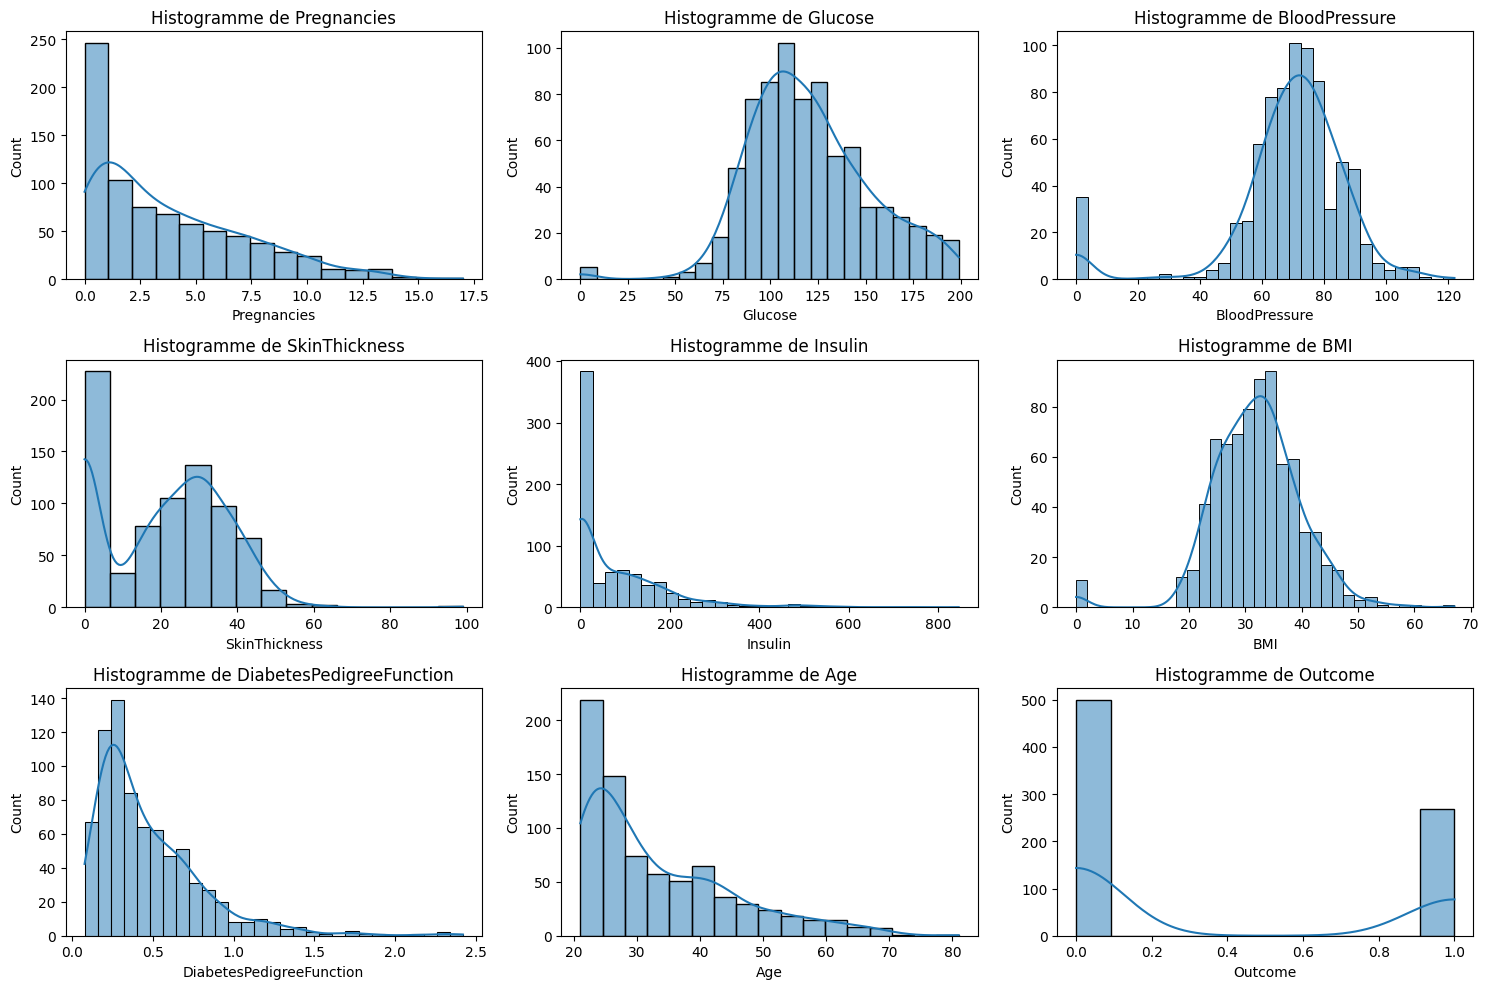

In [17]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque colonne et tracer l'histogramme correspondant
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogramme de {col}')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

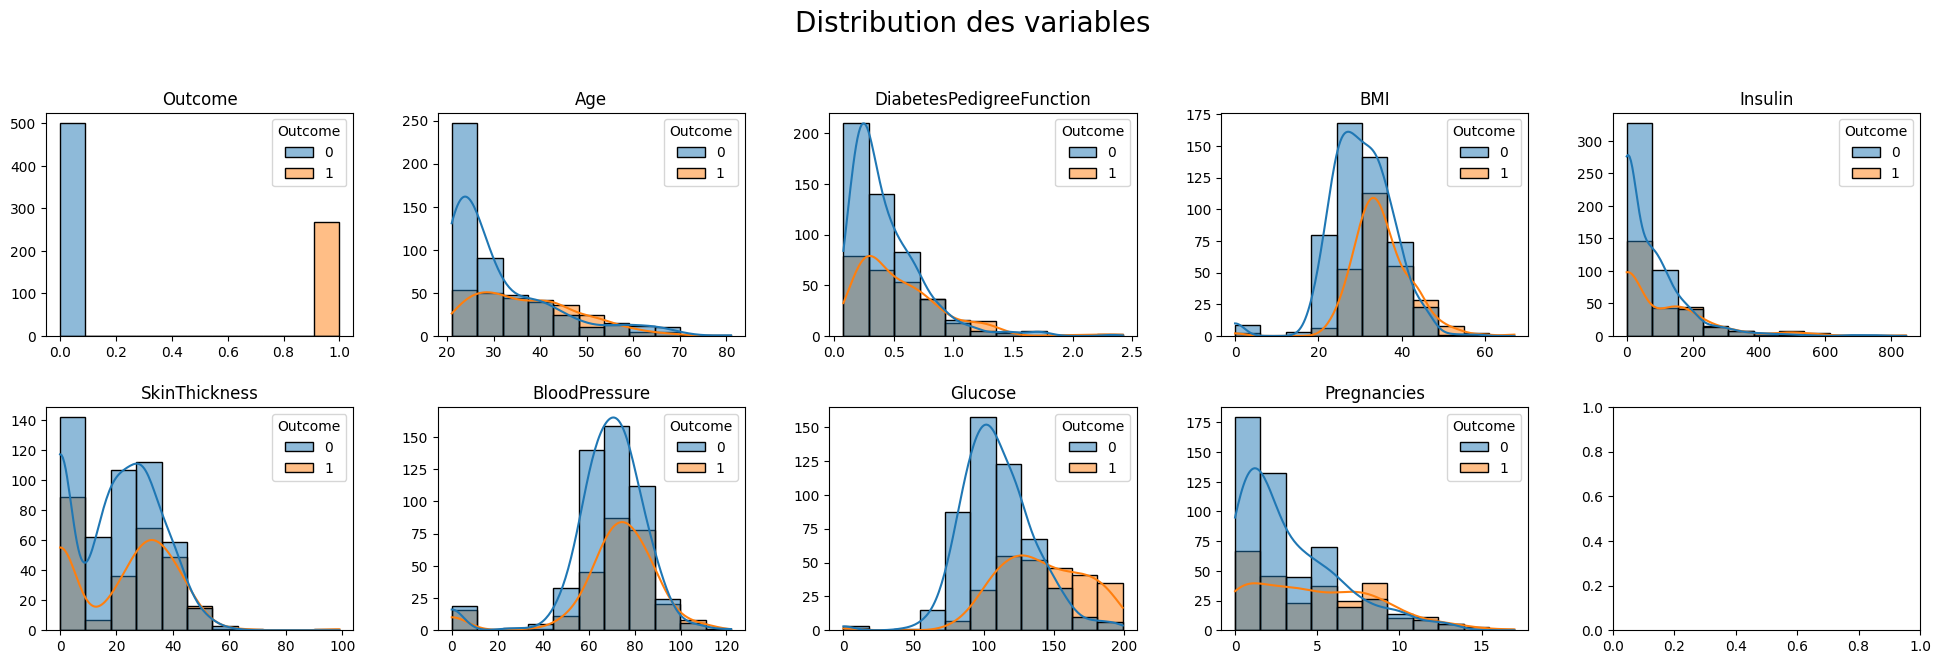

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(data.columns[::-1]):
    sns.histplot(data, x=col, hue='Outcome', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')
    
plt.show()

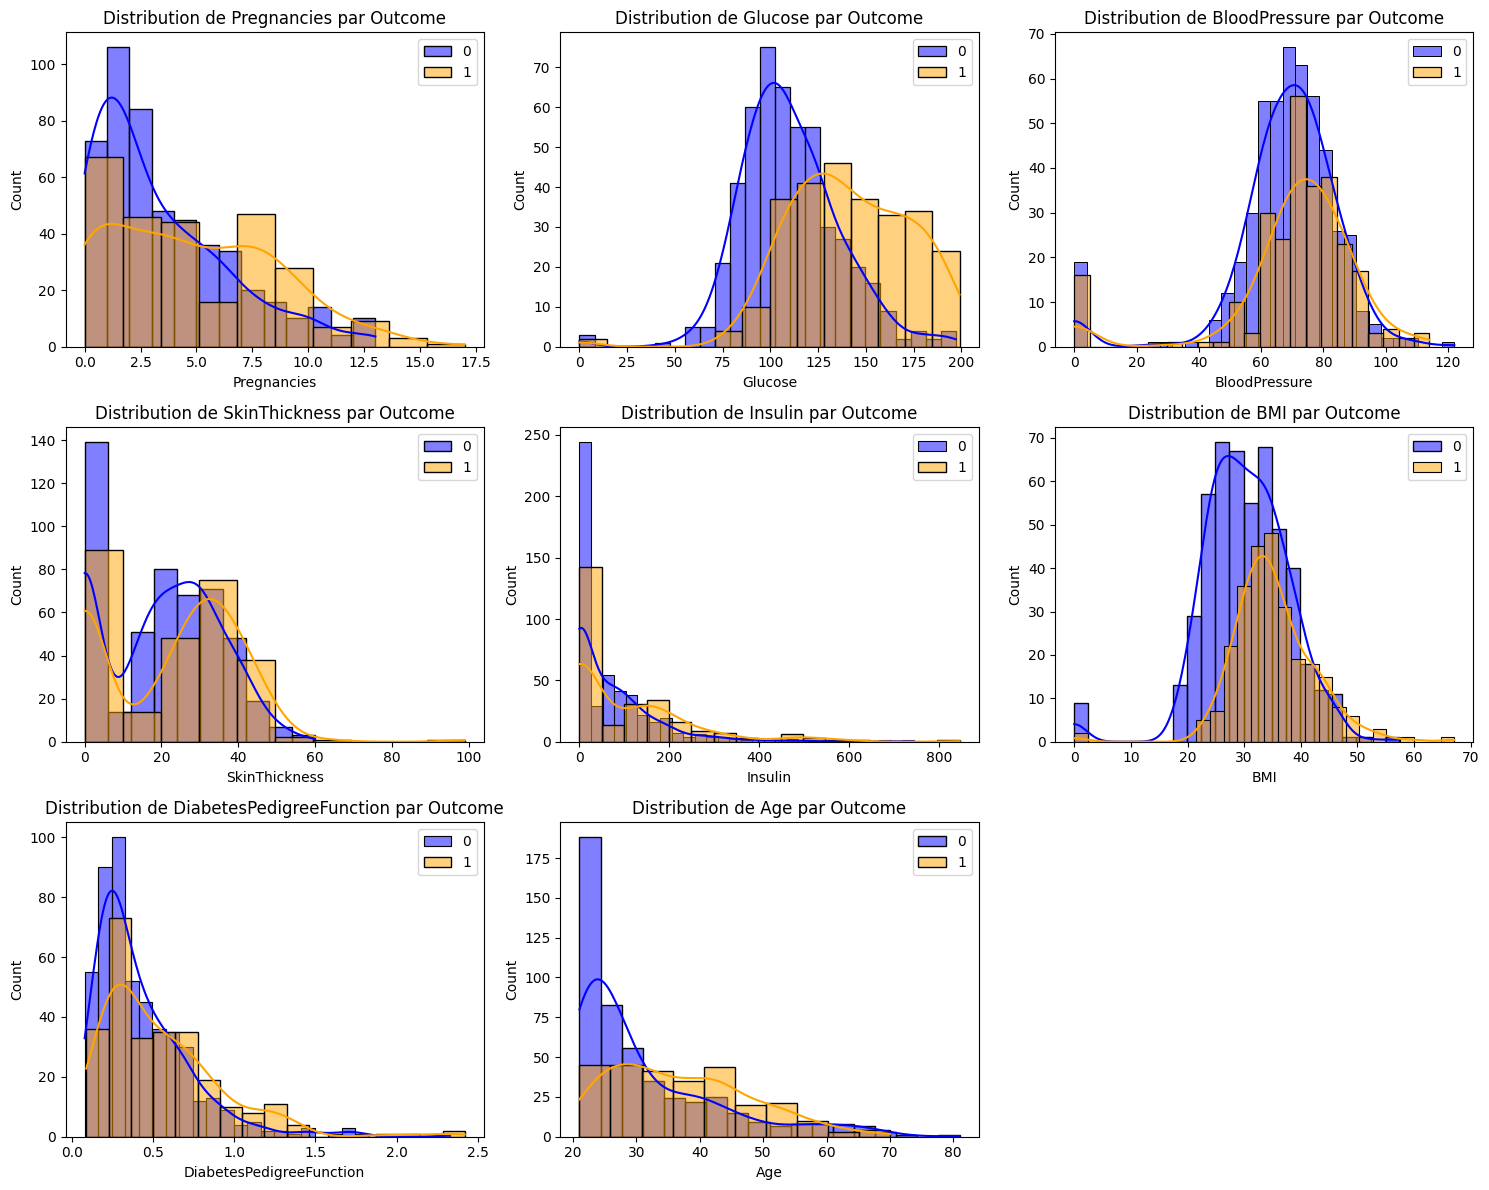

In [19]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les distributions
for i, feature in enumerate(features):
    sns.histplot(data[data['Outcome'] == 0][feature], color='blue', kde=True, ax=axs[i], label='0')
    sns.histplot(data[data['Outcome'] == 1][feature], color='orange', kde=True, ax=axs[i], label='1')
    '''plt.axvline(x=data[data['Outcome'] == 0][feature].median(), color='blue', linestyle='--', label='Mean for 0')
    plt.axvline(x=data[data['Outcome'] == 1][feature].median(), color='orange', linestyle='--', label='Mean for 1')'''
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [20]:
# Calculer la skewness pour chaque colonne pour Outcome = 1
skewness_outcome_1 = data_outcome_1.apply(lambda x: skew(x.dropna()))

# Calculer la skewness pour chaque colonne pour Outcome = 0
skewness_outcome_0 = data_outcome_0.apply(lambda x: skew(x.dropna()))

# Afficher les résultats
print("Skewness pour Outcome = 1 :")
print(skewness_outcome_1)

print("\nSkewness pour Outcome = 0 :")
print(skewness_outcome_0)

Skewness pour Outcome = 1 :
Pregnancies                 0.500925
Glucose                    -0.492779
BloodPressure              -1.932738
SkinThickness               0.115260
Insulin                     1.833495
BMI                         0.000593
DiabetesPedigreeFunction    1.712718
Age                         0.578385
Outcome                          NaN
dtype: float64

Skewness pour Outcome = 0 :
Pregnancies                 1.110760
Glucose                     0.172591
BloodPressure              -1.804391
SkinThickness               0.031062
Insulin                     2.491239
BMI                        -0.663903
DiabetesPedigreeFunction    2.000218
Age                         1.566891
Outcome                          NaN
dtype: float64


C:\Users\corre\AppData\Local\Temp\ipykernel_16020\81388528.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_outcome_1 = data_outcome_1.apply(lambda x: skew(x.dropna()))


In [21]:
'''     Interprétation des résultats :

        Skewness pour Outcome = 1 :
        Pregnancies : Skewness de 0.500925, indiquant une légère asymétrie positive.
        Glucose : Skewness de -0.492779, indiquant une légère asymétrie négative.
        BloodPressure : Skewness de -1.932738, indiquant une asymétrie négative plus prononcée.
        SkinThickness : Skewness de 0.115260, indiquant une légère asymétrie positive.
        Insulin : Skewness de 1.833495, indiquant une forte asymétrie positive.
        BMI : Skewness de 0.000593, indiquant une quasi-symétrie (très proche de zéro).
        DiabetesPedigreeFunction : Skewness de 1.712718, indiquant une forte asymétrie positive.
        Age : Skewness de 0.578385, indiquant une asymétrie positive modérée.
       
        Skewness pour Outcome = 0 :
        Pregnancies : Skewness de 1.110760, indiquant une asymétrie positive.
        Glucose : Skewness de 0.172591, indiquant une légère asymétrie positive.
        BloodPressure : Skewness de -1.804391, indiquant une asymétrie négative assez prononcée.
        SkinThickness : Skewness de 0.031062, indiquant une légère asymétrie positive.
        Insulin : Skewness de 2.491239, indiquant une forte asymétrie positive.
        BMI : Skewness de -0.663903, indiquant une asymétrie négative.
        DiabetesPedigreeFunction : Skewness de 2.000218, indiquant une forte asymétrie positive.
        Age : Skewness de 1.566891, indiquant une asymétrie positive.

        Conclusion :
        
        Les variables telles que Insulin, DiabetesPedigreeFunction et BloodPressure montrent une forte asymétrie positive dans les deux groupes.
        BMI semble être la variable la plus symétrique, avec une skewness proche de zéro dans les deux groupes.
        Les variables comme Glucose, Age et Pregnancies montrent une asymétrie positive modérée à légère.
        BloodPressure montre une asymétrie négative assez prononcée dans les deux groupes.
'''


'     Interprétation des résultats :\n\n        Skewness pour Outcome = 1 :\n        Pregnancies : Skewness de 0.500925, indiquant une légère asymétrie positive.\n        Glucose : Skewness de -0.492779, indiquant une légère asymétrie négative.\n        BloodPressure : Skewness de -1.932738, indiquant une asymétrie négative plus prononcée.\n        SkinThickness : Skewness de 0.115260, indiquant une légère asymétrie positive.\n        Insulin : Skewness de 1.833495, indiquant une forte asymétrie positive.\n        BMI : Skewness de 0.000593, indiquant une quasi-symétrie (très proche de zéro).\n        DiabetesPedigreeFunction : Skewness de 1.712718, indiquant une forte asymétrie positive.\n        Age : Skewness de 0.578385, indiquant une asymétrie positive modérée.\n       \n        Skewness pour Outcome = 0 :\n        Pregnancies : Skewness de 1.110760, indiquant une asymétrie positive.\n        Glucose : Skewness de 0.172591, indiquant une légère asymétrie positive.\n        BloodPr

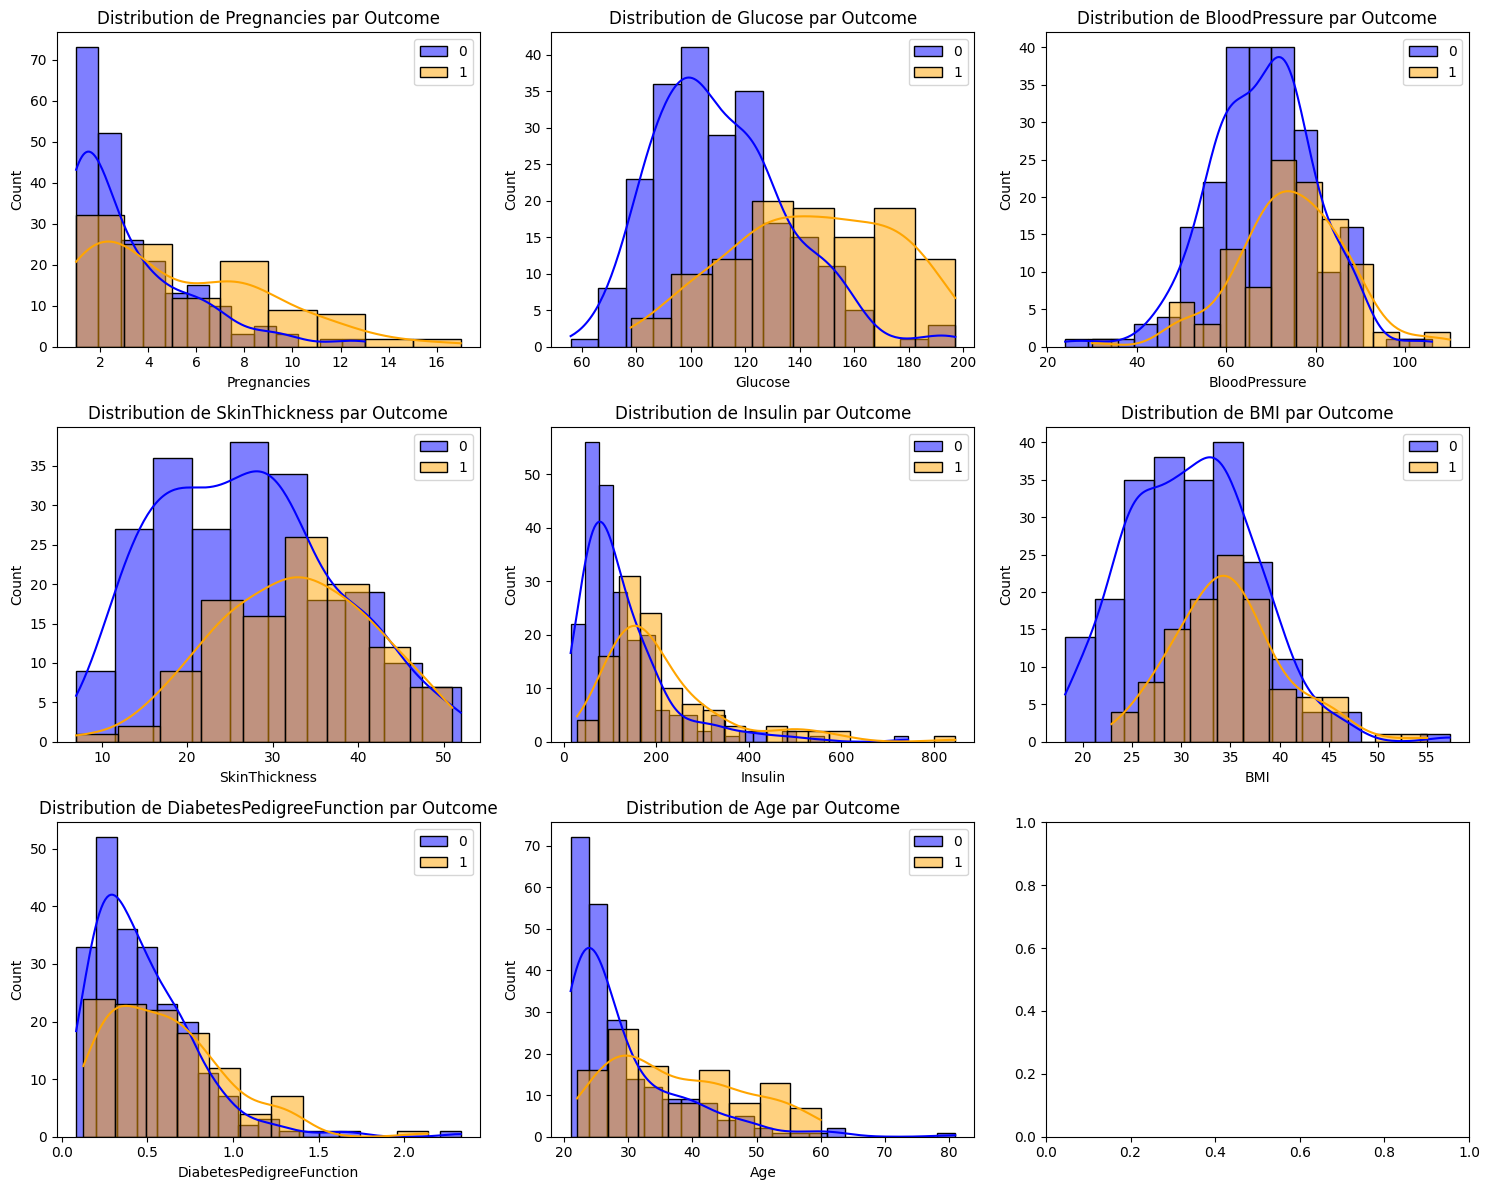

In [22]:
# Sélectionner les lignes où toutes les colonnes de features sont différentes de zéro
data_no_0 = data.loc[(data[features] != 0).all(axis=1)]


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.histplot(data_no_0[data_no_0['Outcome'] == 0][feature], color='blue', kde=True, ax=axs[i], label='0')
    sns.histplot(data_no_0[data_no_0['Outcome'] == 1][feature], color='orange', kde=True, ax=axs[i], label='1')
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [23]:
data_no_0_outcome_0 = data_no_0[data_no_0['Outcome'] == 0]
data_no_0_outcome_1 = data_no_0[data_no_0['Outcome'] == 1]

In [24]:
# Calculer la skewness pour chaque colonne pour Outcome = 1
skewness_data_no_0_outcome_1 = data_no_0_outcome_1.apply(lambda x: skew(x.dropna()))

# Calculer la skewness pour chaque colonne pour Outcome = 0
skewness_data_no_0_outcome_0 = data_no_0_outcome_0.apply(lambda x: skew(x.dropna()))

# Afficher les résultats
print("Skewness pour Outcome = 1 :")
print(skewness_data_no_0_outcome_1)

print("\nSkewness pour Outcome = 0 :")
print(skewness_data_no_0_outcome_0)

Skewness pour Outcome = 1 :
Pregnancies                 0.767552
Glucose                    -0.177760
BloodPressure              -0.238337
SkinThickness              -0.157507
Insulin                     1.960336
BMI                         0.611624
DiabetesPedigreeFunction    1.140667
Age                         0.426204
Outcome                          NaN
dtype: float64

Skewness pour Outcome = 0 :
Pregnancies                 1.525738
Glucose                     0.718934
BloodPressure              -0.213442
SkinThickness               0.348355
Insulin                     2.417754
BMI                         0.399703
DiabetesPedigreeFunction    1.922897
Age                         2.068008
Outcome                          NaN
dtype: float64


C:\Users\corre\AppData\Local\Temp\ipykernel_16020\168784043.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_data_no_0_outcome_1 = data_no_0_outcome_1.apply(lambda x: skew(x.dropna()))


In [25]:
''' Analyse si pregnancies = 0 ou > 0 selon outcome toujours'''

' Analyse si pregnancies = 0 ou > 0 selon outcome toujours'

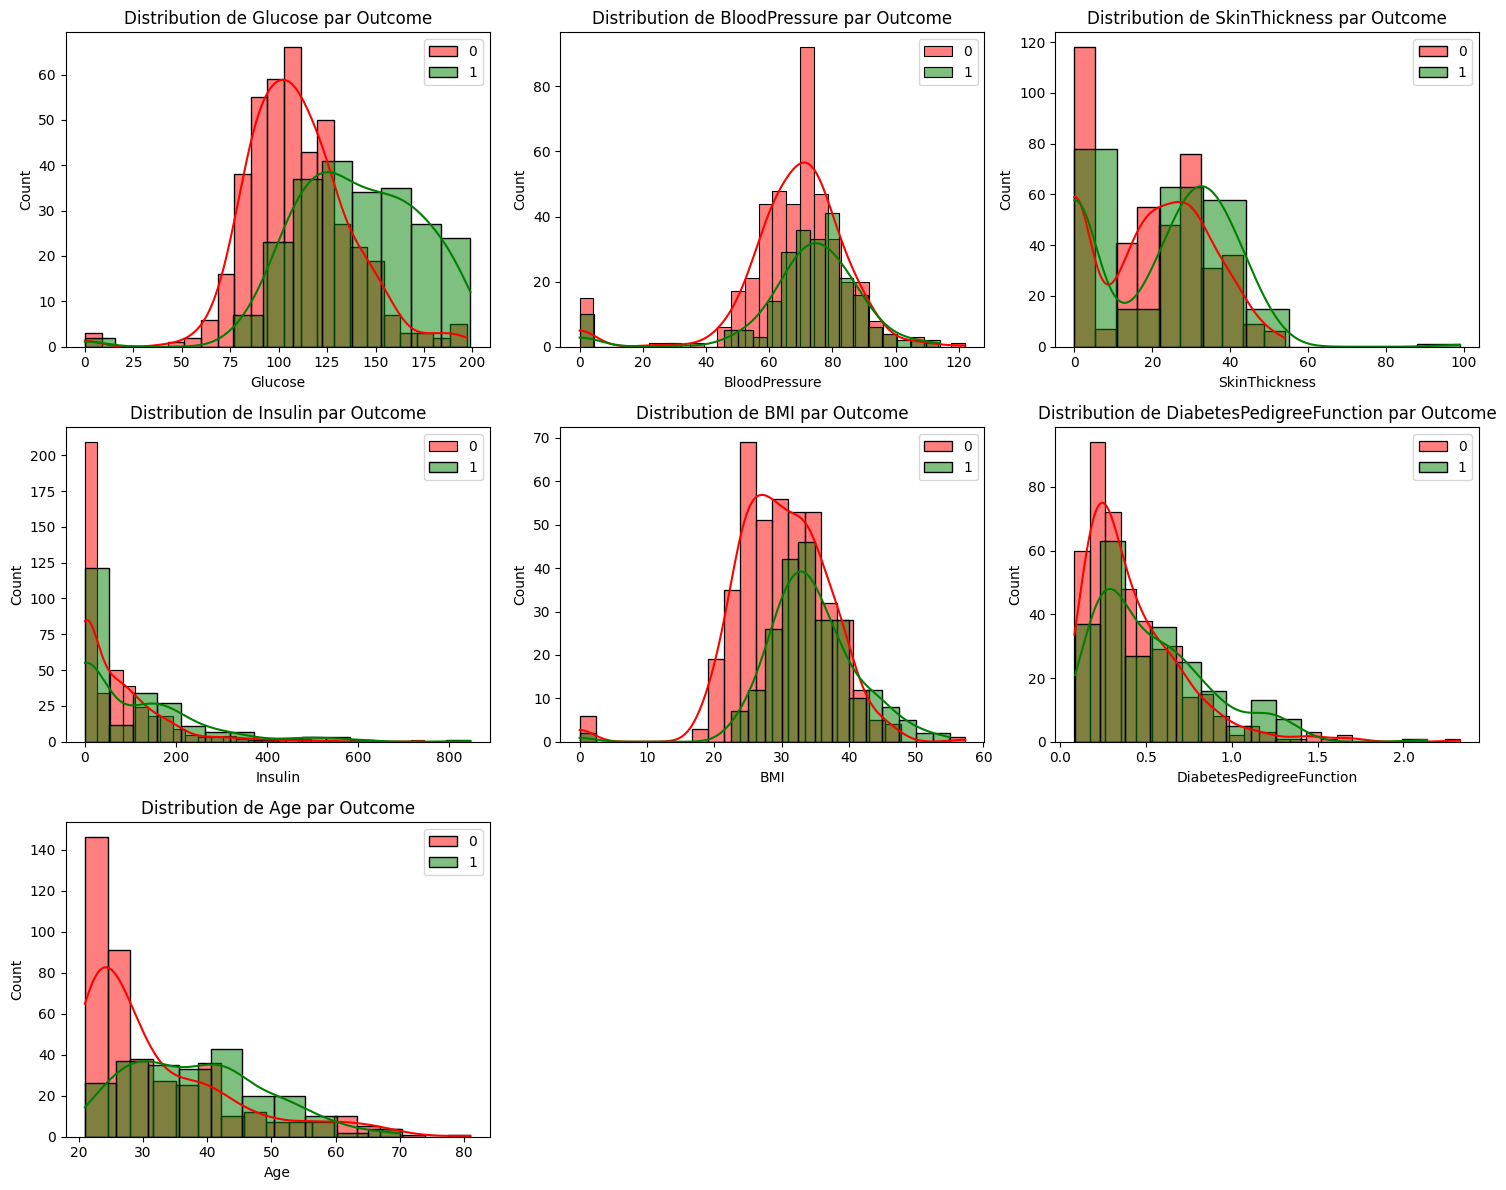

In [26]:
features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()


# Boucle pour tracer les memes histogrammes que precedement mais que sur les personnes ayant eu au moins un enfant

for i, feature in enumerate(features):
    # Filtrer les données pour Outcome == 0 et Pregnancy >= 1
    data_filt_preg1_0 = data[(data['Outcome'] == 0) & (data['Pregnancies'] >= 1)][feature]
    # Filtrer les données pour Outcome == 1 et Pregnancy >= 1
    data_filt_preg1_1 = data[(data['Outcome'] == 1) & (data['Pregnancies'] >= 1)][feature]
    
    # Tracer les distributions pour Outcome == 0
    sns.histplot(data=data_filt_preg1_0, color='red', kde=True, ax=axs[i], label='0')
    # Tracer les distributions pour Outcome == 1
    sns.histplot(data=data_filt_preg1_1, color='green', kde=True, ax=axs[i], label='1')
    
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(len(features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


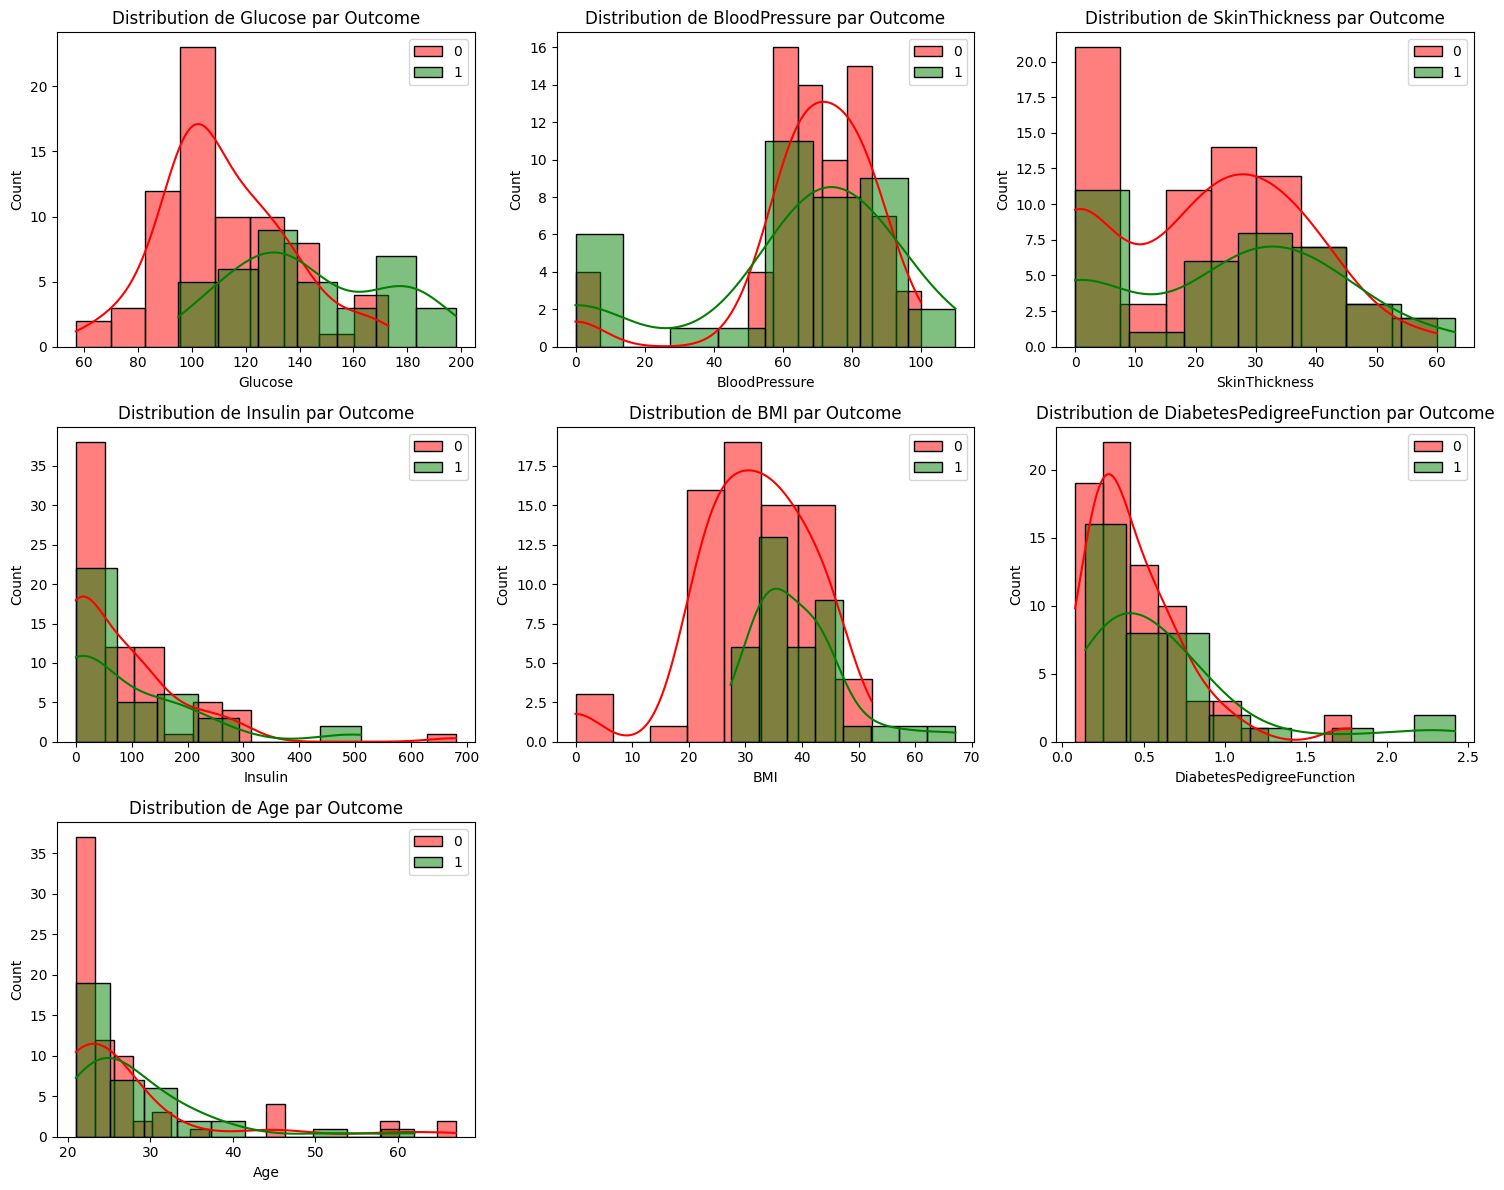

In [27]:
features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()


# Boucle pour tracer les memes histogrammes que precedement mais que sur les personnes n'ayant pas eu d'enfant

for i, feature in enumerate(features):
    # Filtrer les données pour Outcome == 0 et Pregnancy >= 1
    data_filt_preg0_0 = data[(data['Outcome'] == 0) & (data['Pregnancies'] == 0)][feature]
    # Filtrer les données pour Outcome == 1 et Pregnancy >= 1
    data_filt_preg0_1 = data[(data['Outcome'] == 1) & (data['Pregnancies'] == 0)][feature]
    
    # Tracer les distributions pour Outcome == 0
    sns.histplot(data=data_filt_preg0_0, color='red', kde=True, ax=axs[i], label='0')
    # Tracer les distributions pour Outcome == 1
    sns.histplot(data=data_filt_preg0_1, color='green', kde=True, ax=axs[i], label='1')
    
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(len(features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


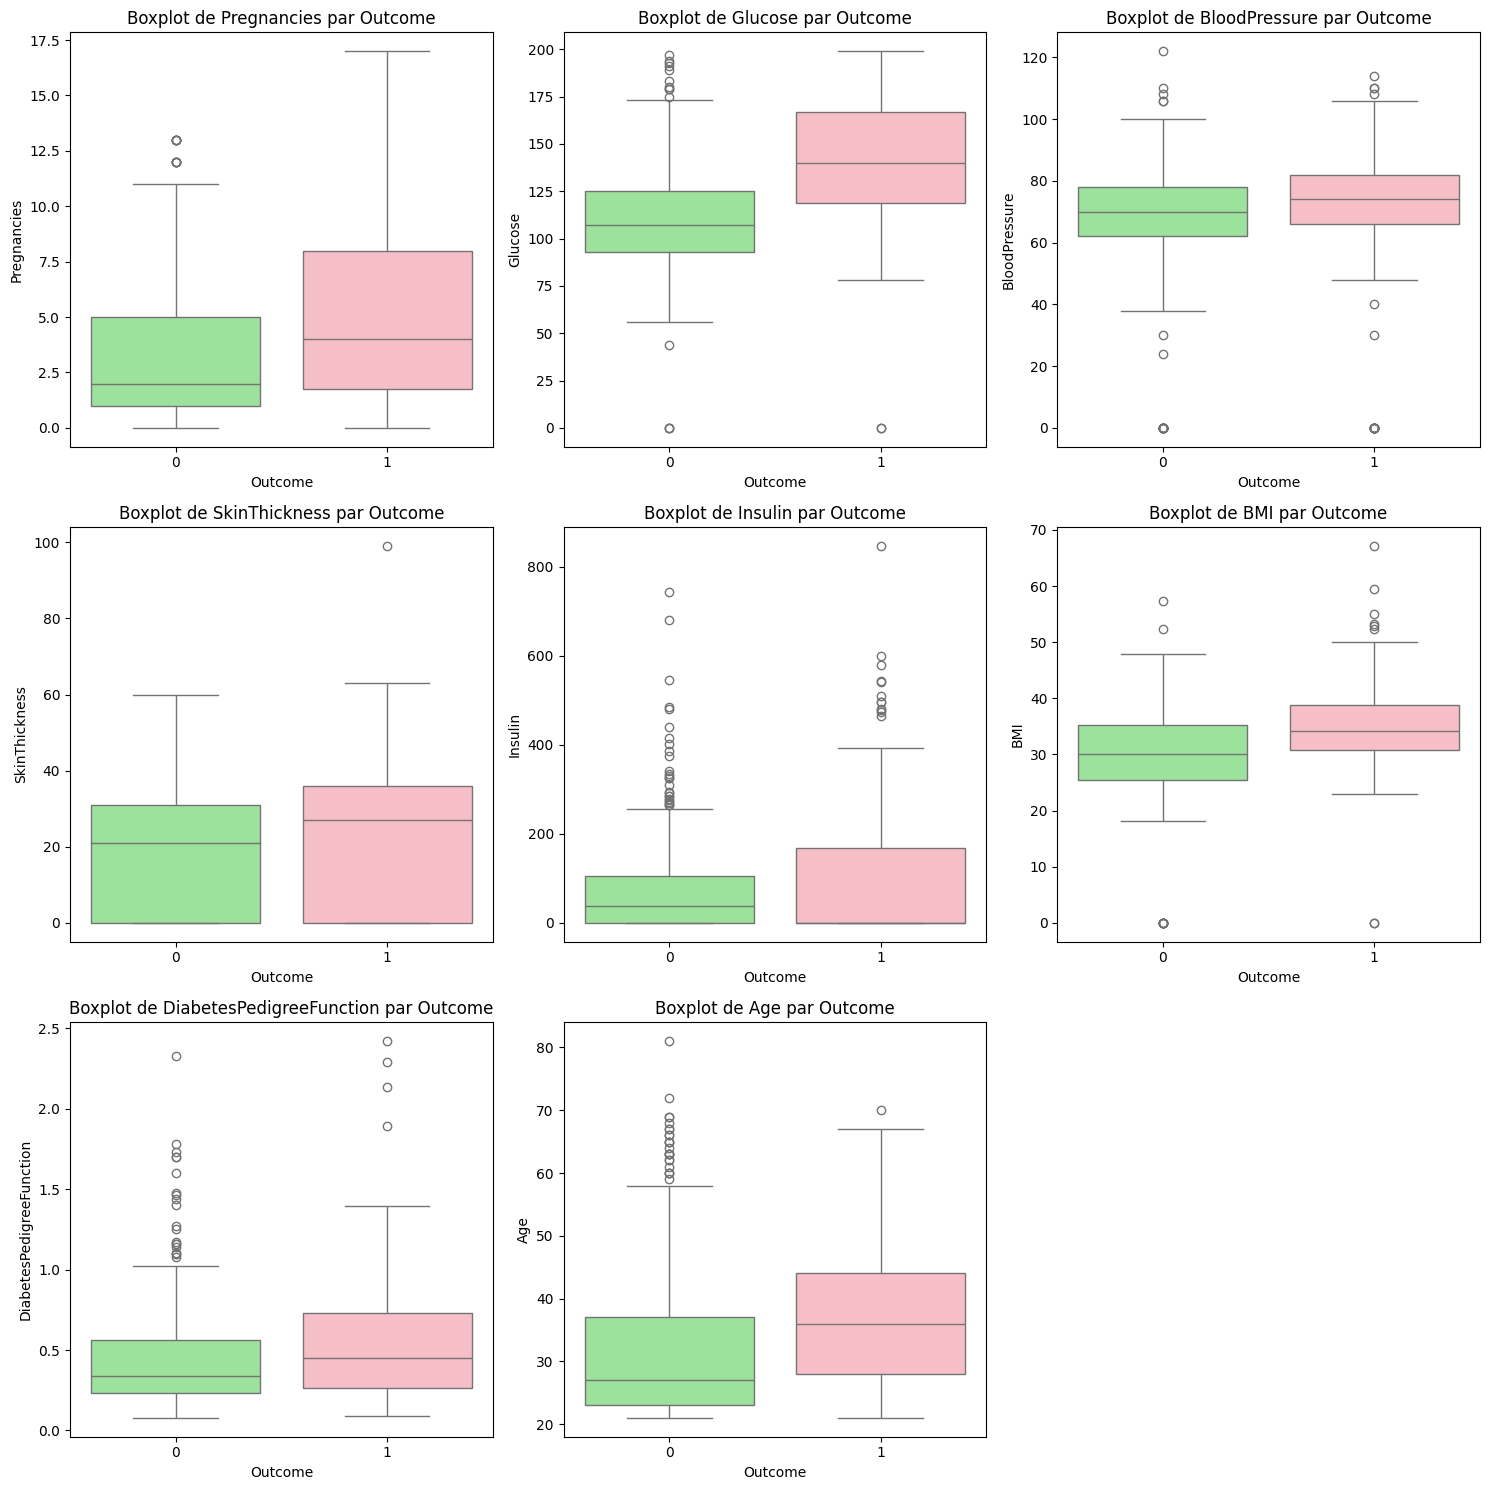

In [28]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les boîtes à moustaches
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=data, hue='Outcome', palette=['lightgreen', 'lightpink'], ax=axs[i], legend=False)
    axs[i].set_title(f'Boxplot de {feature} par Outcome')

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [29]:
''' Les boxplots nous permettent de voir que des valeurs sortent de l'ordinaires dans certaines lignes
    Nous allons devoir explorer ces données afin de determiner si elles sont due à la maladie ou si 
    elles sont des valeurs abérrantes à modifier ou supprimer'''

" Les boxplots nous permettent de voir que des valeurs sortent de l'ordinaires dans certaines lignes\n    Nous allons devoir explorer ces données afin de determiner si elles sont due à la maladie ou si \n    elles sont des valeurs abérrantes à modifier ou supprimer"

#### 1.2.2 - Analyse statique descriptive de base

In [30]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [31]:
data_outcome_0.describe()

Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
min      0.000000                  0.078000   21.000000      0.0  
25%     25.400000                  0.229750   23.000000      0.0  
50%     30.050000                  0.336000   27.000000      0.0  
75%     35.300000                  0.561750   37.000000      0.0  
max     57.300000                  2.329000   81.000000      0.0

In [32]:
data_outcome_1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254      0.0  
min      0.000000                  0.088000   21.000000      1.0  
25%     30.800000                  0.262500   28.000000      1.0  
50%     34.250000                  0.449000   36.000000      1.0  
75%     38.775000                  0.728000   44.000000      1.0  
max     67.100000                  2.420000   70.000000      1.0

In [33]:
data_outcome_0['Insulin'].describe()

count    500.000000
mean      68.792000
std       98.865289
min        0.000000
25%        0.000000
50%       39.000000
75%      105.000000
max      744.000000
Name: Insulin, dtype: float64

In [34]:
data_outcome_0[data_outcome_0['Insulin'] != 0].describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   264.000000  264.000000     264.000000     264.000000  264.000000   
mean      2.704545  111.034091      68.969697      27.208333  130.287879   
std       2.615364   25.491868      11.855556      10.407211  102.482237   
min       0.000000    0.000000      24.000000       7.000000   15.000000   
25%       1.000000   94.000000      60.000000      18.750000   66.000000   
50%       2.000000  107.500000      70.000000      27.000000  102.500000   
75%       4.000000  126.000000      76.000000      34.000000  161.250000   
max      13.000000  197.000000     106.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  264.000000                264.000000  264.000000    264.0  
mean    31.615152                  0.476280   28.291667      0.0  
std      7.049650                  0.308198    8.977484      0.0  
min      0.000000                  0.085000   21.000000      0.0  
25%     26.075000                  0.261000   22.000000      0.0  
50%     31.200000                  0.413500   25.000000      0.0  
75%     36.100000                  0.626750   30.000000      0.0  
max     57.300000                  2.329000   81.000000      0.0

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [35]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### 1.3.2 - Analyse des  statistique de base

In [36]:
# alpha=0.5 : Définit la transparence des points. 
# Une valeur de 0.5 signifie que les points seront semi-transparents, 
# ce qui aide à visualiser les zones avec une densité de points élevée.
# s=50 : Définit la taille des points. Une taille de 50 rend les points 
# suffisamment grands pour être visibles, mais pas trop gros pour ne pas encombrer le graphique.

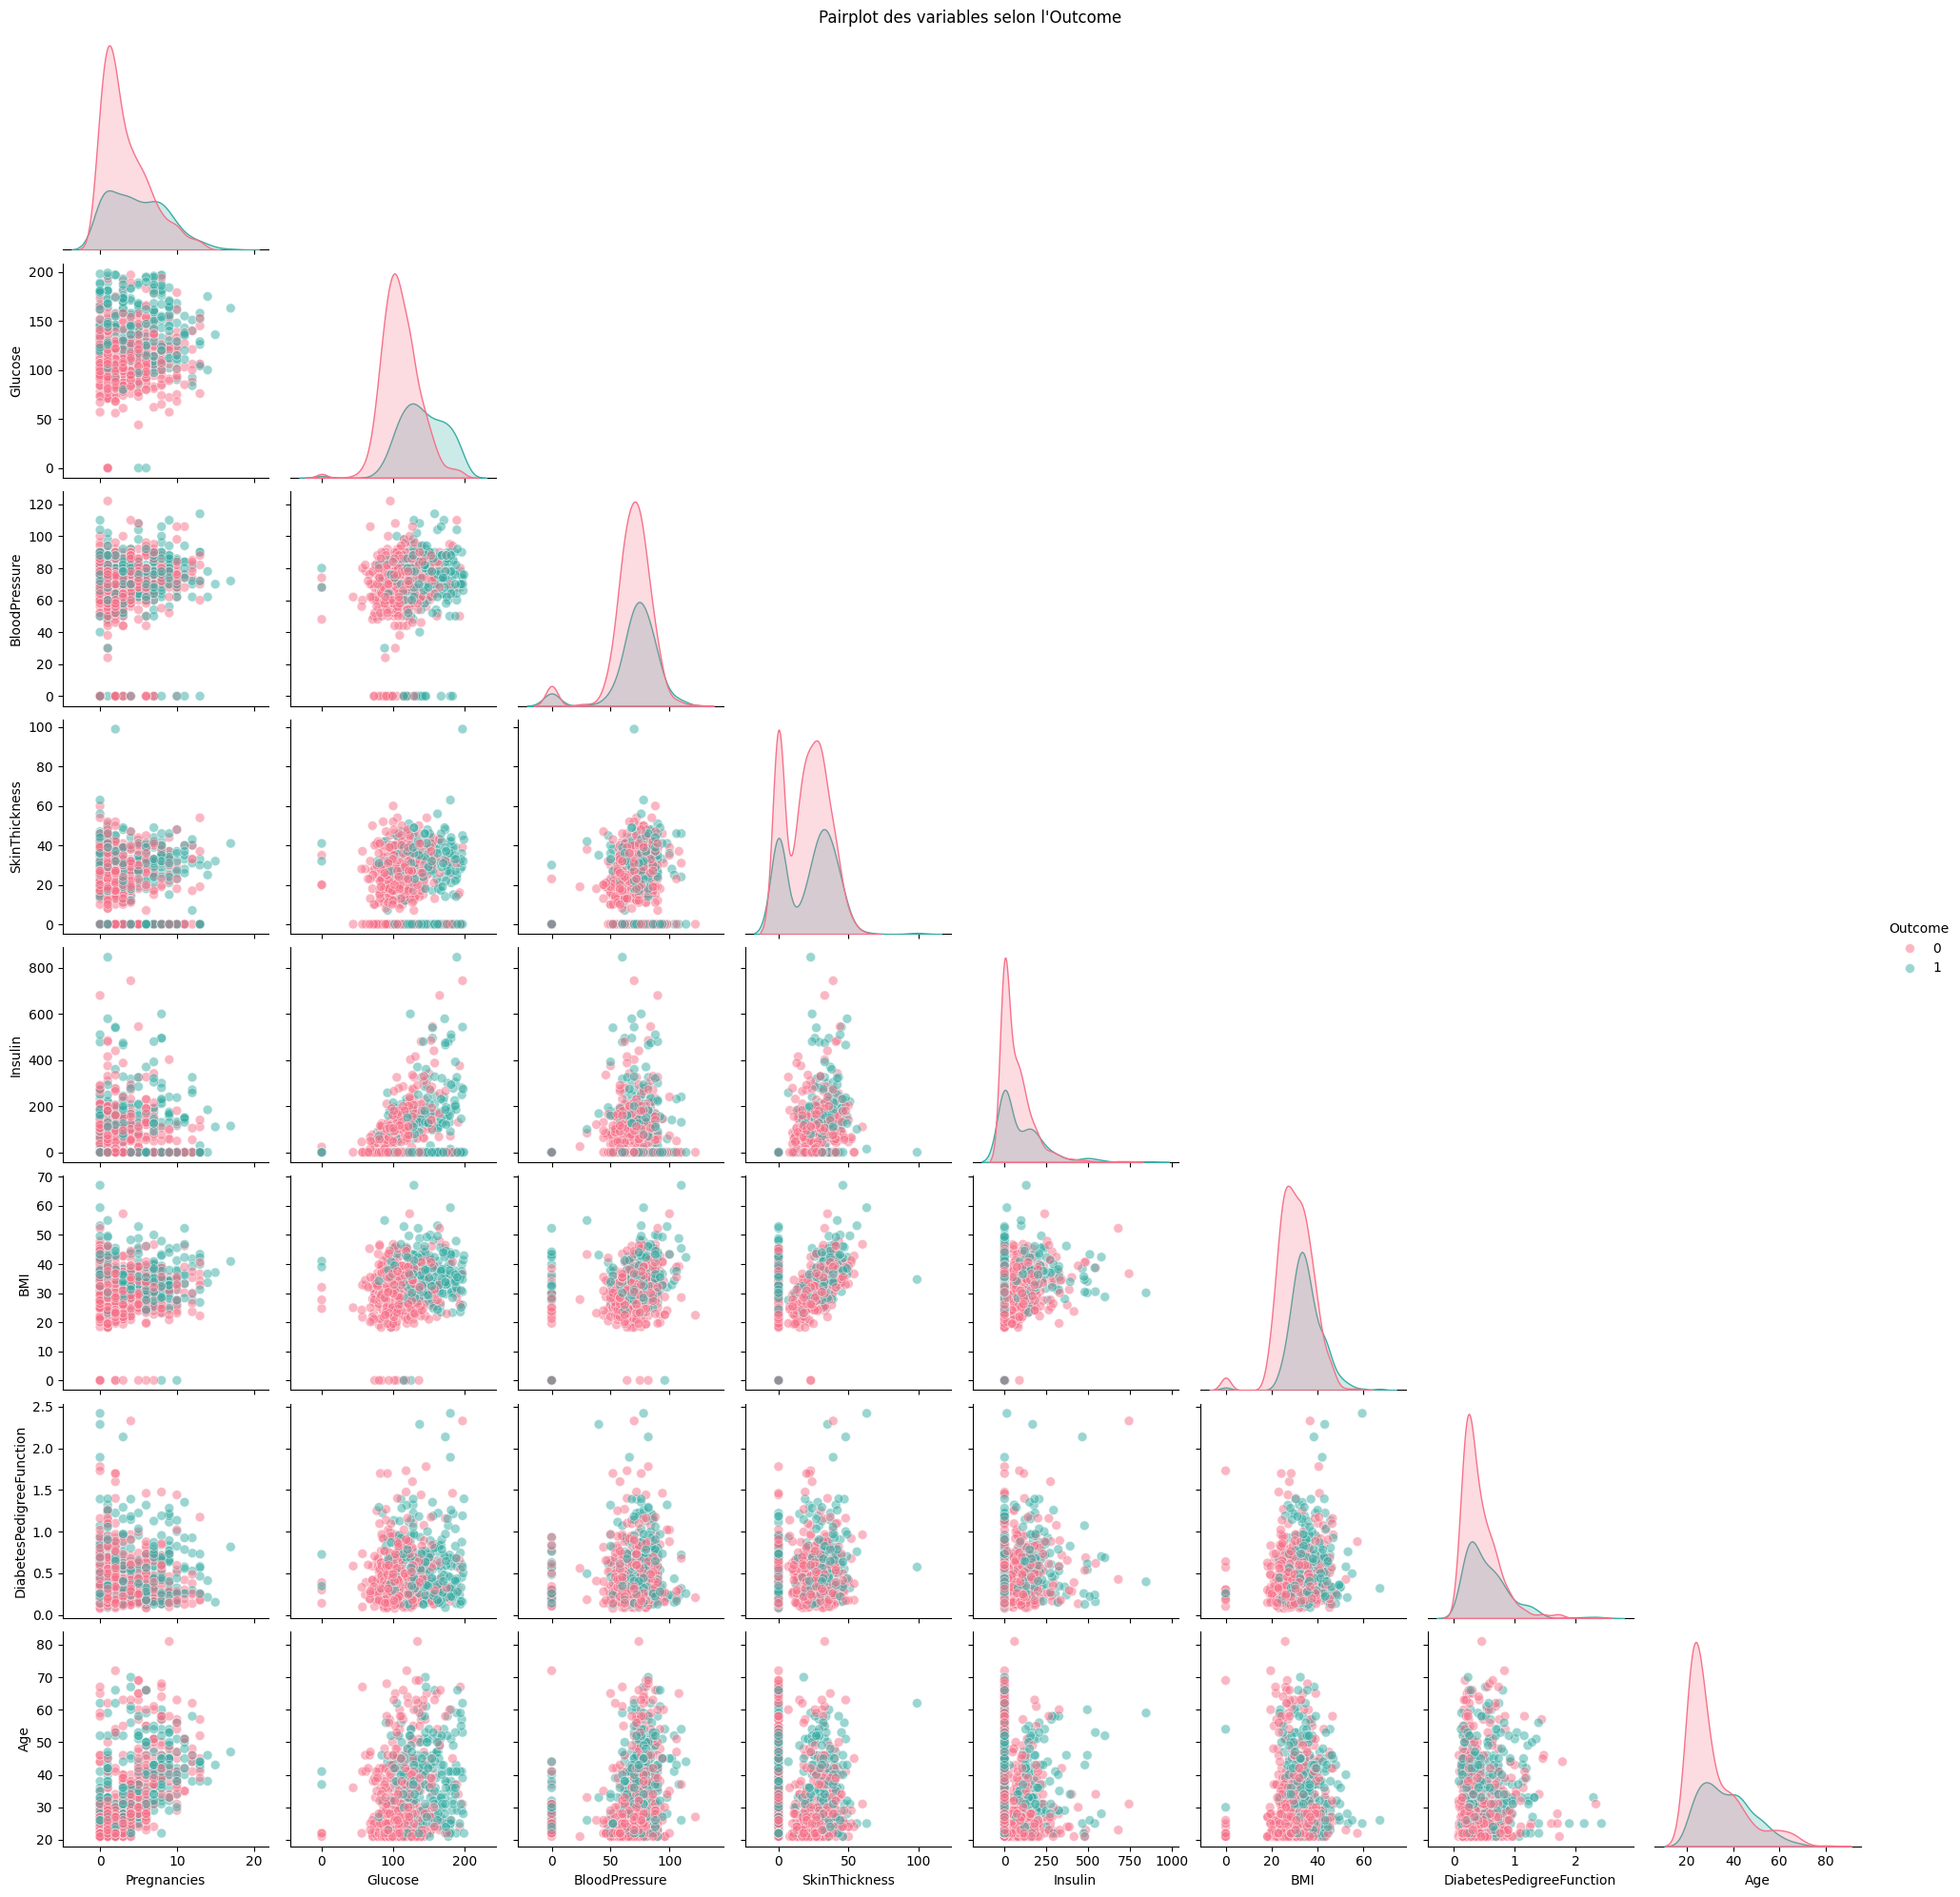

In [37]:
# Créer le pairplot avec une palette de couleurs et en mode "corner" = sans doublons
pairplot = sns.pairplot(data, hue="Outcome", palette="husl", plot_kws={'alpha':0.5, 's':50}, corner=True)

pairplot.fig.suptitle('Pairplot des variables selon l\'Outcome', y=1)  #y=1 placement du titre en haut 
plt.show()

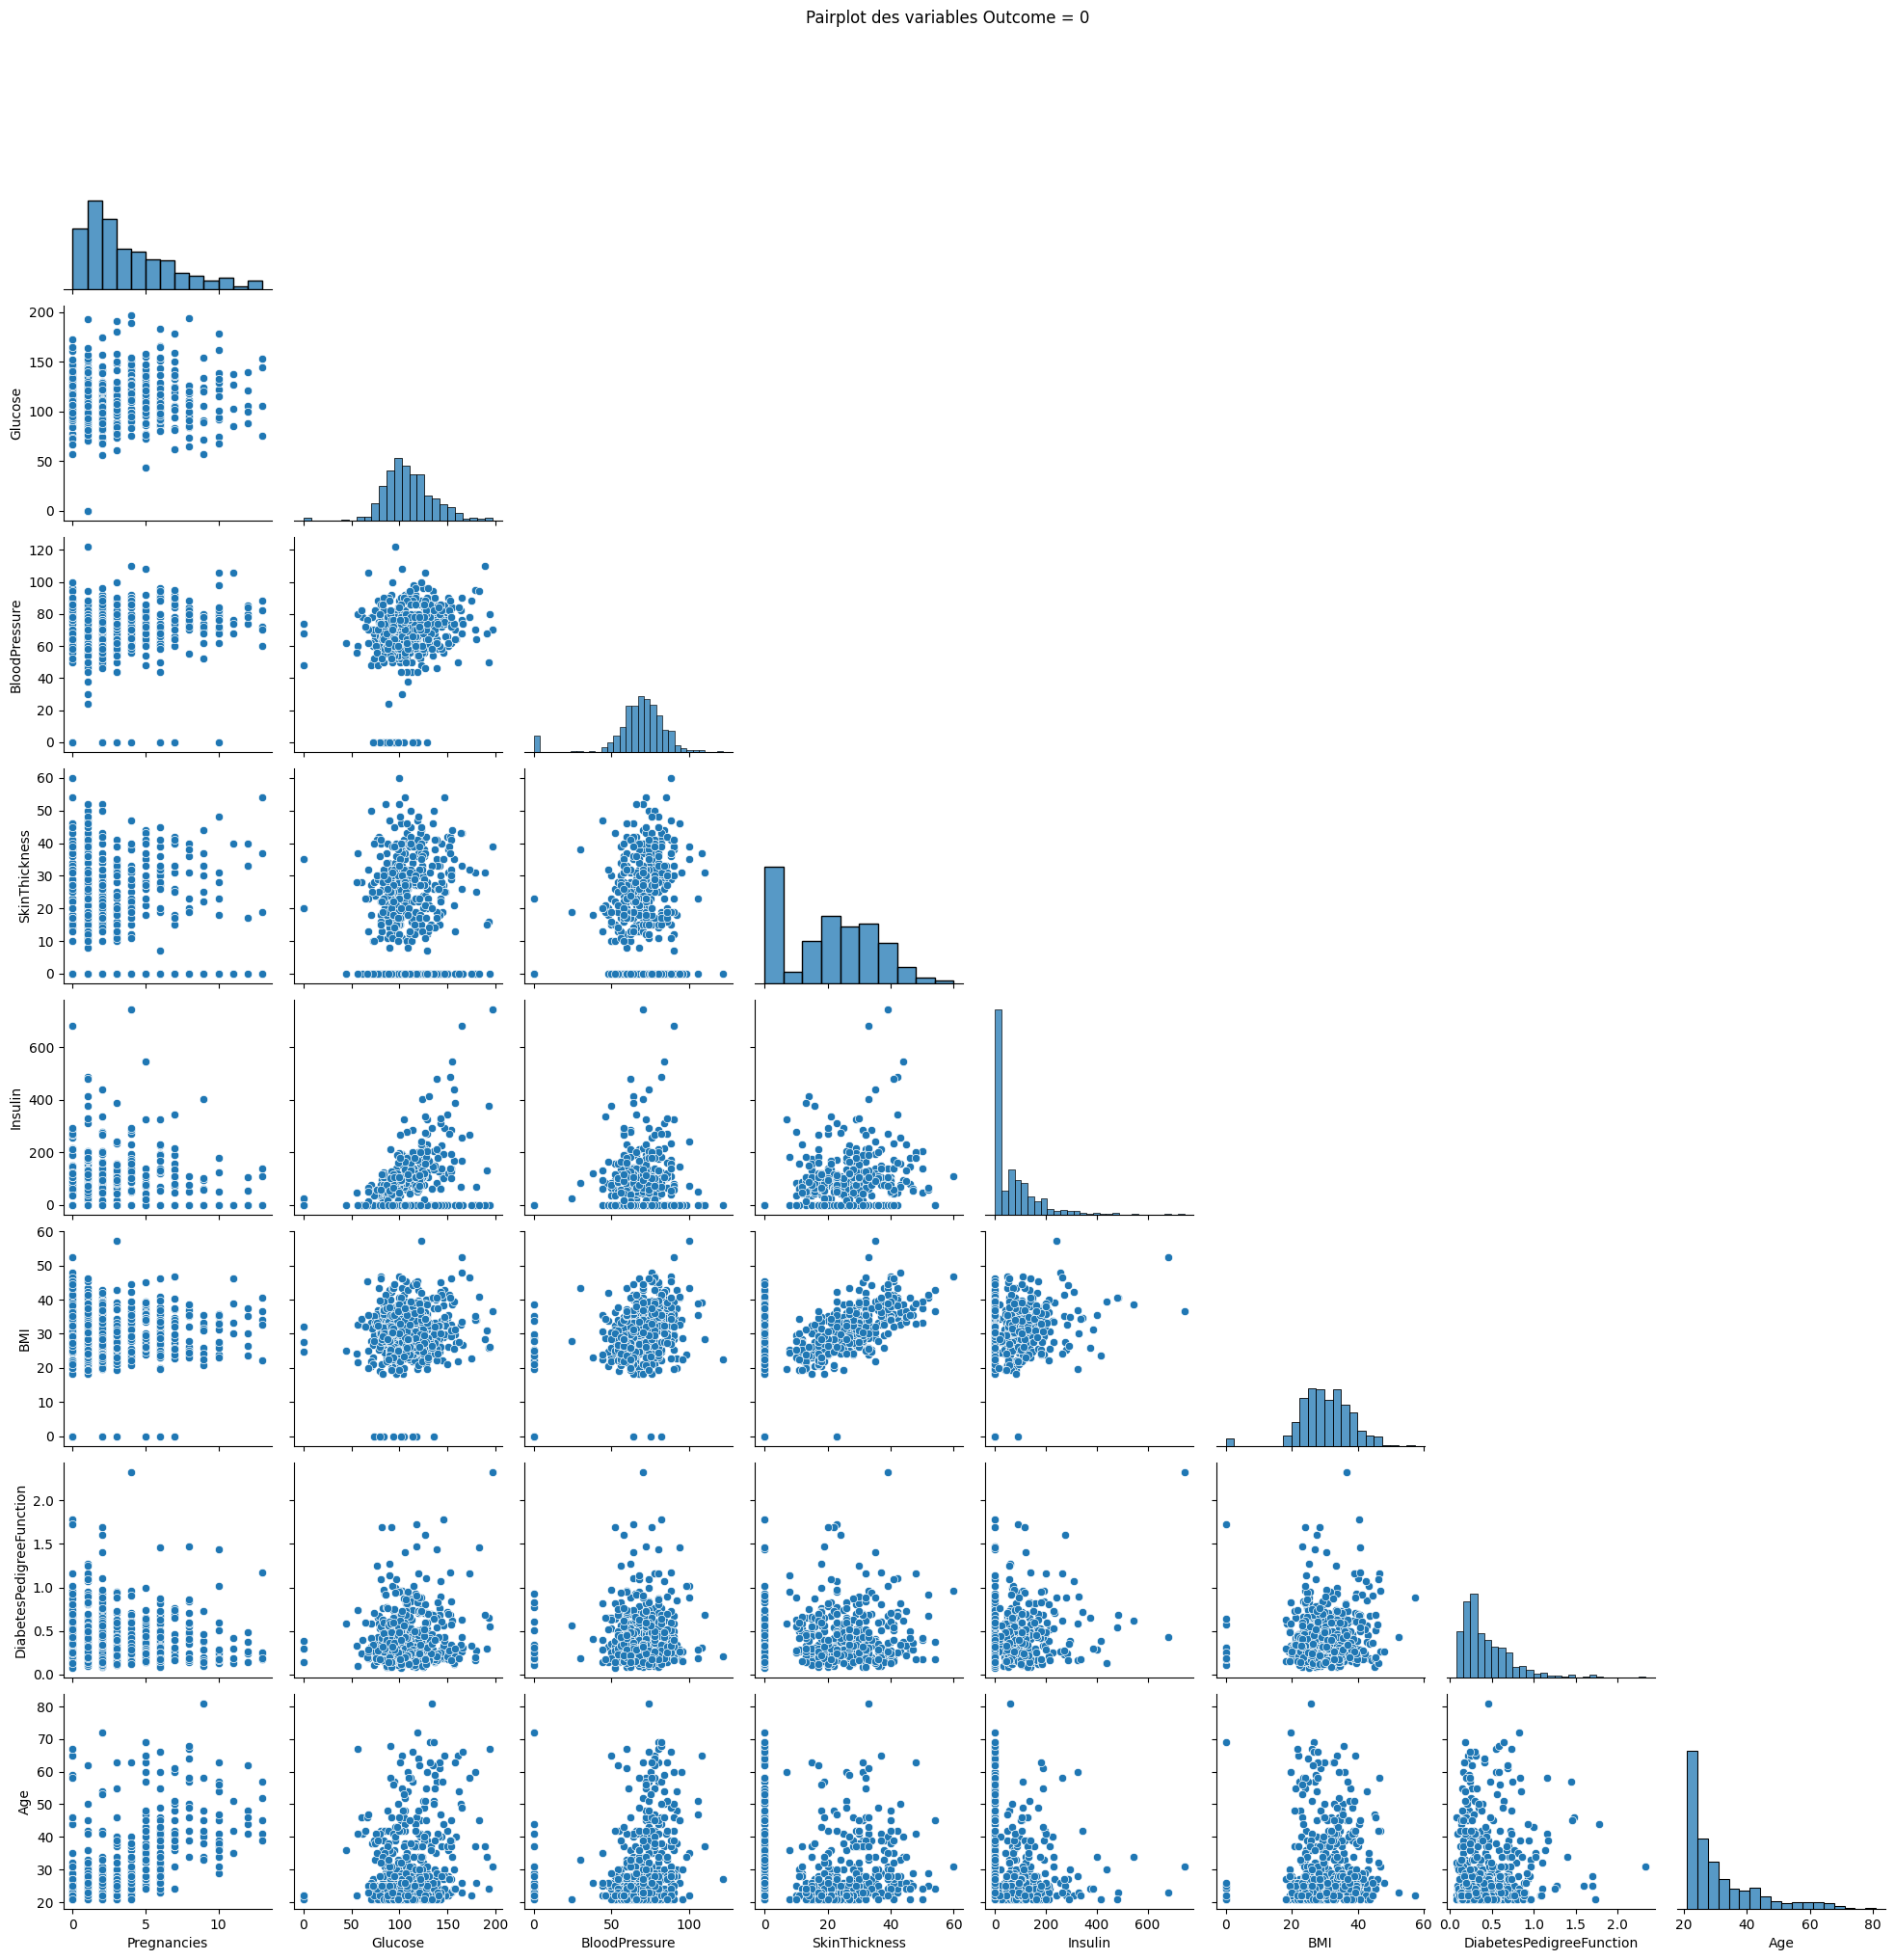

In [38]:
# Créer le pairplot en mode "corner"
pairplot = sns.pairplot(data_outcome_0.drop(columns = "Outcome"), corner=True)

pairplot.fig.suptitle('Pairplot des variables Outcome = 0', y=1.02)  # y=1.02 pour placer le titre en haut

plt.show()

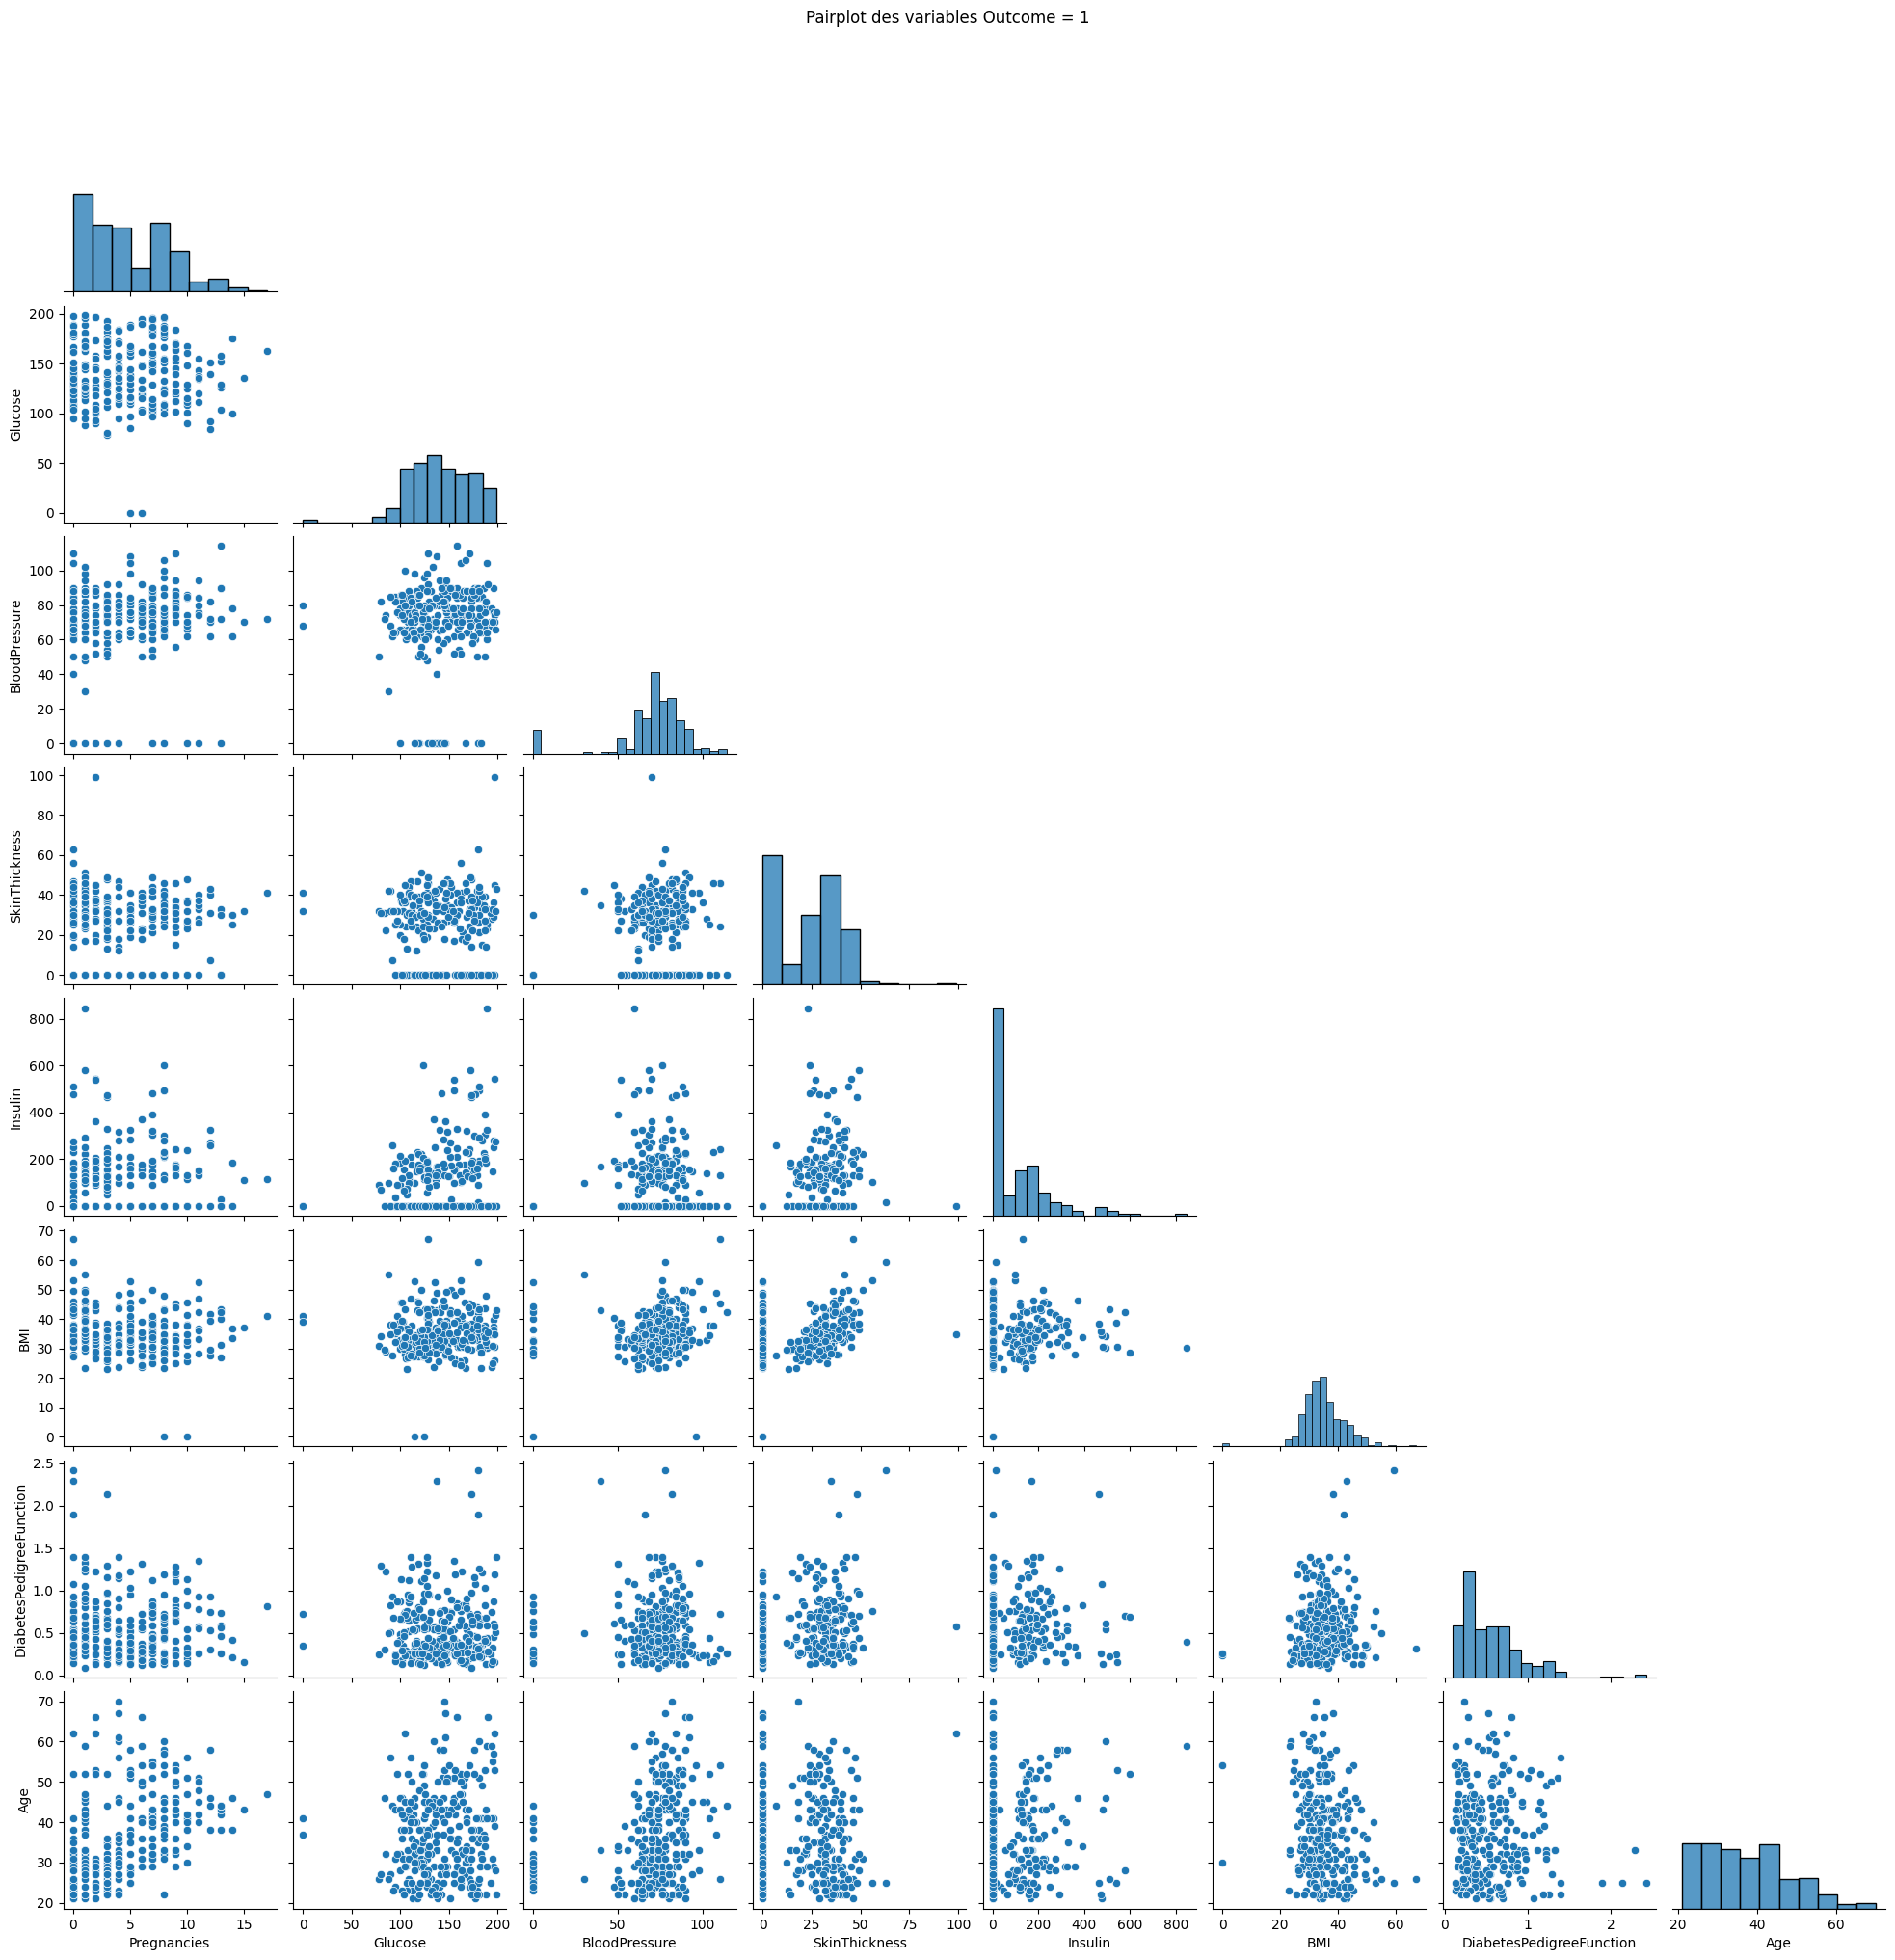

In [39]:
# Créer le pairplot en mode "corner"
pairplot = sns.pairplot(data_outcome_1.drop(columns = "Outcome"), corner=True)

pairplot.fig.suptitle('Pairplot des variables Outcome = 1', y=1.02)  # y=1.02 pour placer le titre en haut

plt.show()

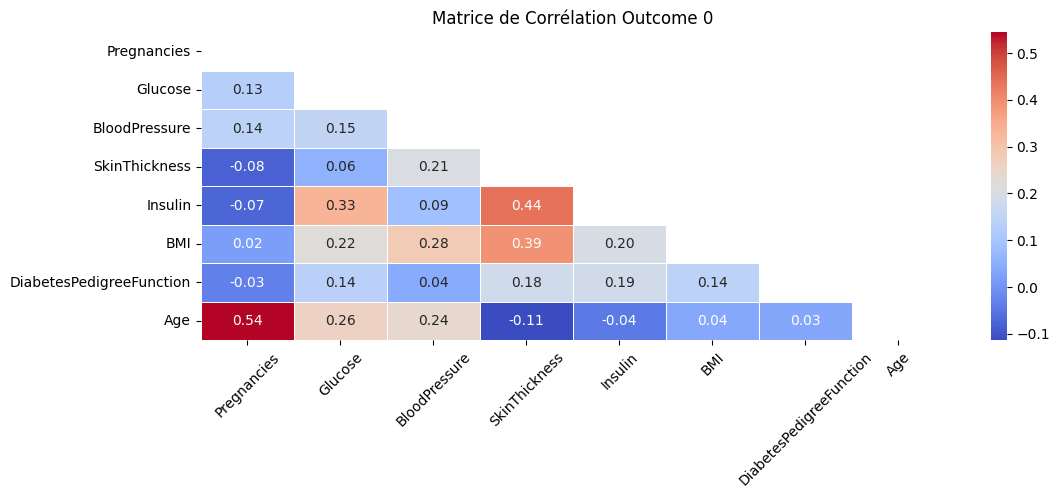

In [40]:
# Calculer la matrice de corrélation
correlation_matrix = data.drop(columns = "Outcome").corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation Outcome 0')
plt.xticks(rotation=45)
plt.show()

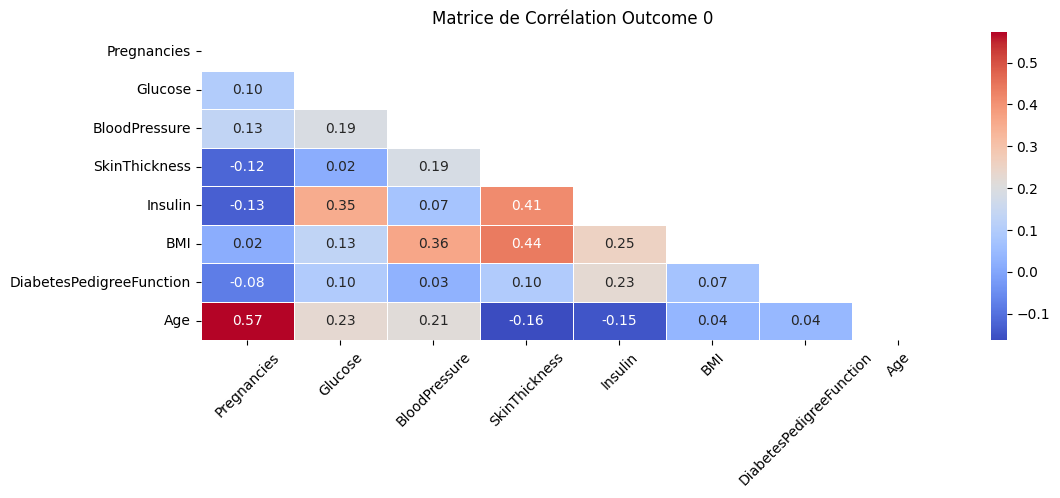

In [41]:
# Calculer la matrice de corrélation
correlation_matrix_0 = data_outcome_0.drop(columns = "Outcome").corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix_0, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation Outcome 0')
plt.xticks(rotation=45)
plt.show()

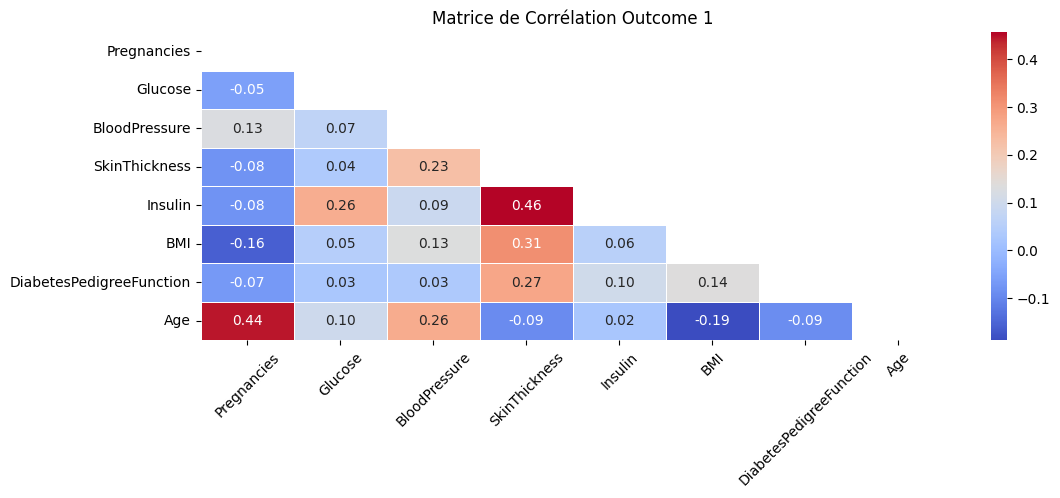

In [42]:
# Calculer la matrice de corrélation
correlation_matrix_1 = data_outcome_1.drop(columns = "Outcome").corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix_1, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.xticks(rotation=45)
plt.title('Matrice de Corrélation Outcome 1')
plt.show()

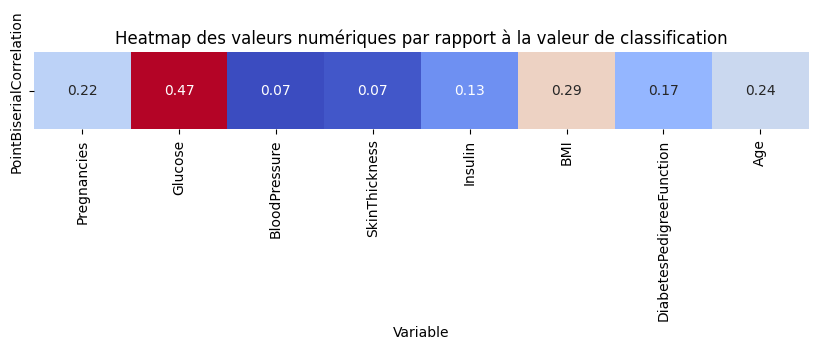

In [43]:
continuous_cols = data.drop(columns = "Outcome")

correlations = {}
for col in continuous_cols.columns:

    correlations[col] = pointbiserialr(data['Outcome'], data[col])[0]

corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

plt.figure(figsize=(10, 1))

sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')

plt.show()

In [44]:
'''

Le coefficient de corrélation de Pearson est une formule qui permet de quantifier la relation
linéaire entre deux variables : le coefficient est un réel entre -1 et 1 avec :

1 les variables sont corrélées

0 les variables sont décorrélées

-1 les variables sont corrélées négativement

Pour rejeter ou non cette hypothèse, on regarde la p-value du test : i cette dernière est en dessous de 5%, on rejette H0.

'''

'\n\nLe coefficient de corrélation de Pearson est une formule qui permet de quantifier la relation\nlinéaire entre deux variables : le coefficient est un réel entre -1 et 1 avec :\n\n1 les variables sont corrélées\n\n0 les variables sont décorrélées\n\n-1 les variables sont corrélées négativement\n\nPour rejeter ou non cette hypothèse, on regarde la p-value du test : i cette dernière est en dessous de 5%, on rejette H0.\n\n'

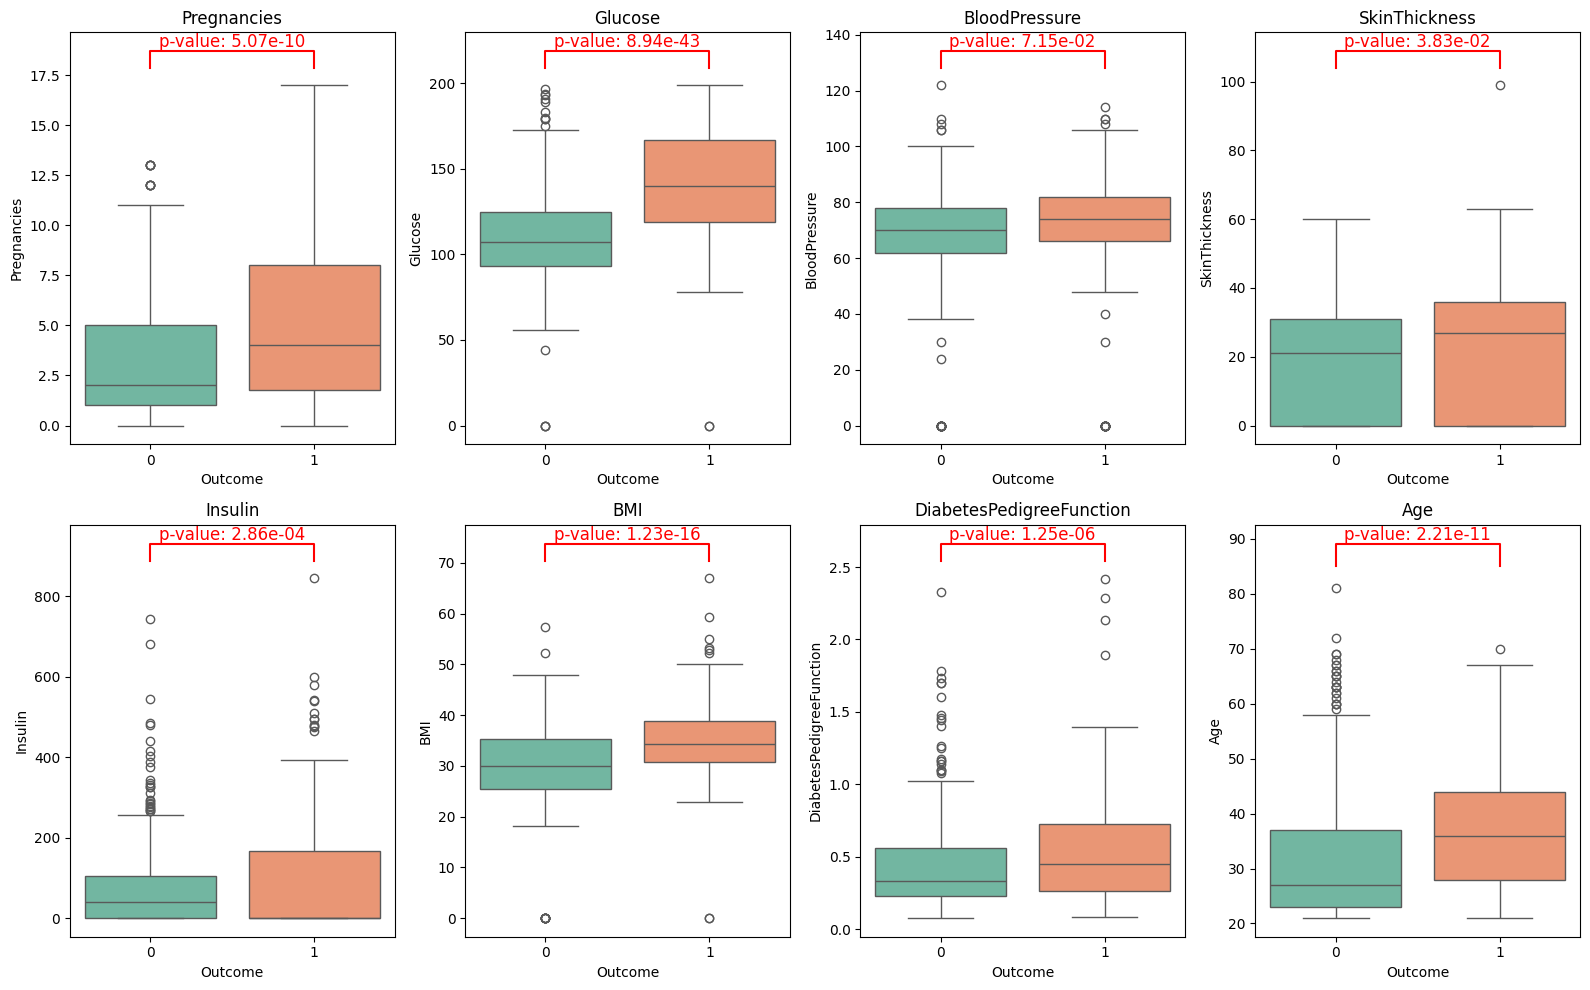

In [45]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Définir la palette de couleurs avec deux couleurs distinctes pour les deux niveaux de 'Outcome'
palette = sns.color_palette("Set2", 2)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=data['Outcome'], y=feature, data=data, ax=axes[i], palette=palette, hue='Outcome', legend=False)
    t_stat, p_value = ttest_ind(data[data['Outcome'] == 0][feature], data[data['Outcome'] == 1][feature]) 
    # Uniquement de la mise en page
    # calcul la valeur max pour positionner la legende au dessus   
    max_value = data[feature].max()
    y, h = max_value + (max_value * 0.05), max_value * 0.05
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c='red')
    axes[i].text(0.5, y+h, f'p-value: {p_value:.2e}', ha='center', va='bottom', color='red', fontsize=12)
    axes[i].set_title(feature)


plt.tight_layout()
plt.show()

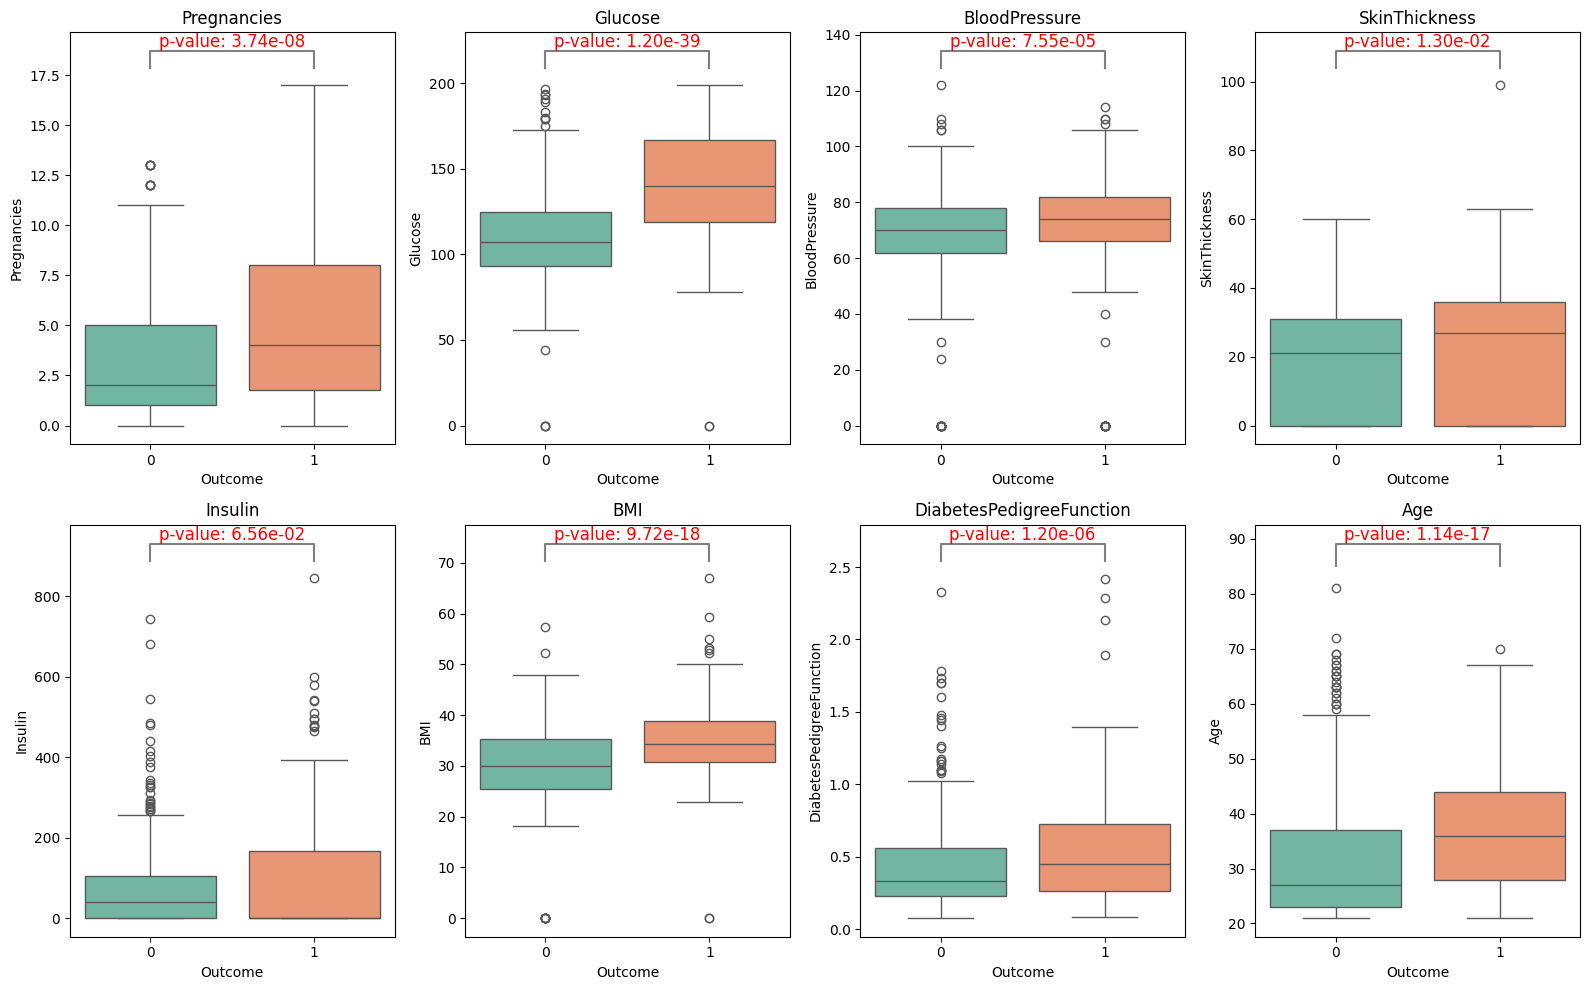

In [46]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Définir la palette de couleurs avec deux couleurs distinctes pour les deux niveaux de 'Outcome'
palette = sns.color_palette("Set2", 2)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=data['Outcome'], y=feature, data=data, ax=axes[i], palette=palette, hue='Outcome', legend=False)
    
    # Effectuer le test de Kruskal-Wallis et obtenir la p-value
    stat, pvalue = kruskal(data[data['Outcome'] == 0][feature], data[data['Outcome'] == 1][feature])
    
    # Trouver la valeur maximale pour ajuster l'annotation
    max_value = data[feature].max()
    
    # Dessiner une ligne au-dessus du graphique pour la p-value
    y, h = max_value + (max_value * 0.05), max_value * 0.05
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, color='gray')  # Gray line for significance
    axes[i].text(0.5, y+h, f'p-value: {pvalue:.2e}', ha='center', va='bottom', color='red', fontsize=12)
    
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [47]:
'''     Interprétation des résultats :

        Skewness pour Outcome = 1 :
        Pregnancies : Skewness de 0.500925, indiquant une légère asymétrie positive.
        Glucose : Skewness de -0.492779, indiquant une légère asymétrie négative.
        BloodPressure : Skewness de -1.932738, indiquant une asymétrie négative plus prononcée.
        SkinThickness : Skewness de 0.115260, indiquant une légère asymétrie positive.
        Insulin : Skewness de 1.833495, indiquant une forte asymétrie positive.
        BMI : Skewness de 0.000593, indiquant une quasi-symétrie (très proche de zéro).
        DiabetesPedigreeFunction : Skewness de 1.712718, indiquant une forte asymétrie positive.
        Age : Skewness de 0.578385, indiquant une asymétrie positive modérée.
       
        Skewness pour Outcome = 0 :
        Pregnancies : Skewness de 1.110760, indiquant une asymétrie positive.
        Glucose : Skewness de 0.172591, indiquant une légère asymétrie positive.
        BloodPressure : Skewness de -1.804391, indiquant une asymétrie négative assez prononcée.
        SkinThickness : Skewness de 0.031062, indiquant une légère asymétrie positive.
        Insulin : Skewness de 2.491239, indiquant une forte asymétrie positive.
        BMI : Skewness de -0.663903, indiquant une asymétrie négative.
        DiabetesPedigreeFunction : Skewness de 2.000218, indiquant une forte asymétrie positive.
        Age : Skewness de 1.566891, indiquant une asymétrie positive.

        Conclusion :
        
        Les variables telles que Insulin, DiabetesPedigreeFunction et BloodPressure montrent une forte asymétrie positive dans les deux groupes.
        BMI semble être la variable la plus symétrique, avec une skewness proche de zéro dans les deux groupes.
        Les variables comme Glucose, Age et Pregnancies montrent une asymétrie positive modérée à légère.
        BloodPressure montre une asymétrie négative assez prononcée dans les deux groupes.
'''


'     Interprétation des résultats :\n\n        Skewness pour Outcome = 1 :\n        Pregnancies : Skewness de 0.500925, indiquant une légère asymétrie positive.\n        Glucose : Skewness de -0.492779, indiquant une légère asymétrie négative.\n        BloodPressure : Skewness de -1.932738, indiquant une asymétrie négative plus prononcée.\n        SkinThickness : Skewness de 0.115260, indiquant une légère asymétrie positive.\n        Insulin : Skewness de 1.833495, indiquant une forte asymétrie positive.\n        BMI : Skewness de 0.000593, indiquant une quasi-symétrie (très proche de zéro).\n        DiabetesPedigreeFunction : Skewness de 1.712718, indiquant une forte asymétrie positive.\n        Age : Skewness de 0.578385, indiquant une asymétrie positive modérée.\n       \n        Skewness pour Outcome = 0 :\n        Pregnancies : Skewness de 1.110760, indiquant une asymétrie positive.\n        Glucose : Skewness de 0.172591, indiquant une légère asymétrie positive.\n        BloodPr

In [48]:
# Traitement pour la colonne Glucose :
# Pour Outcome = 0 >         Glucose : Skewness de 0.172591, proche de 0. > moyenne
# Pour Outcome = 1 >         Glucose : Skewness de -0.492779, proche de 0 > moyenne


mean_glucose_0 = int(round(data_outcome_0['Glucose'].mean()))
mean_glucose_1 = int(round(data_outcome_1['Glucose'].mean()))


data.loc[(data['Outcome'] == 0) & (data['Glucose'] == 0), 'Glucose'] = mean_glucose_0
data.loc[(data['Outcome'] == 1) & (data['Glucose'] == 0), 'Glucose'] = mean_glucose_1



In [49]:
# Traitement pour la colonne BloodPressure :
# Pour Outcome = 0 >    BloodPressure : x > abs(1)> mediane
# Pour Outcome = 1 >    BloodPressure : x > abs(1) > mediane

median_BloodPressure_0 = int(round(data_outcome_0['BloodPressure'].median()))
median_BloodPressure_1 = int(round(data_outcome_1['BloodPressure'].median()))

data.loc[(data['Outcome'] == 0) & (data['BloodPressure'] == 0), 'BloodPressure'] = median_BloodPressure_0
data.loc[(data['Outcome'] == 1) & (data['BloodPressure'] == 0), 'BloodPressure'] = median_BloodPressure_1


In [50]:
# Traitement pour la colonne BloodPressure :
# Pour Outcome = 0 >    BMI : Skewness de -0.663903, indiquant une asymétrie négative.  > proche de 0 > moyenne
# Pour Outcome = 1 >    BMI : Skewness de 0.000593, indiquant une quasi-symétrie (très proche de zéro). > moyenne

mean_BMI_0 = data_outcome_0['BMI'].mean()
mean_BMI_1 = data_outcome_1['BMI'].mean()

data.loc[(data['Outcome'] == 0) & (data['BMI'] == 0), 'BMI'] = mean_BMI_0
data.loc[(data['Outcome'] == 1) & (data['BMI'] == 0), 'BMI'] = mean_BMI_1

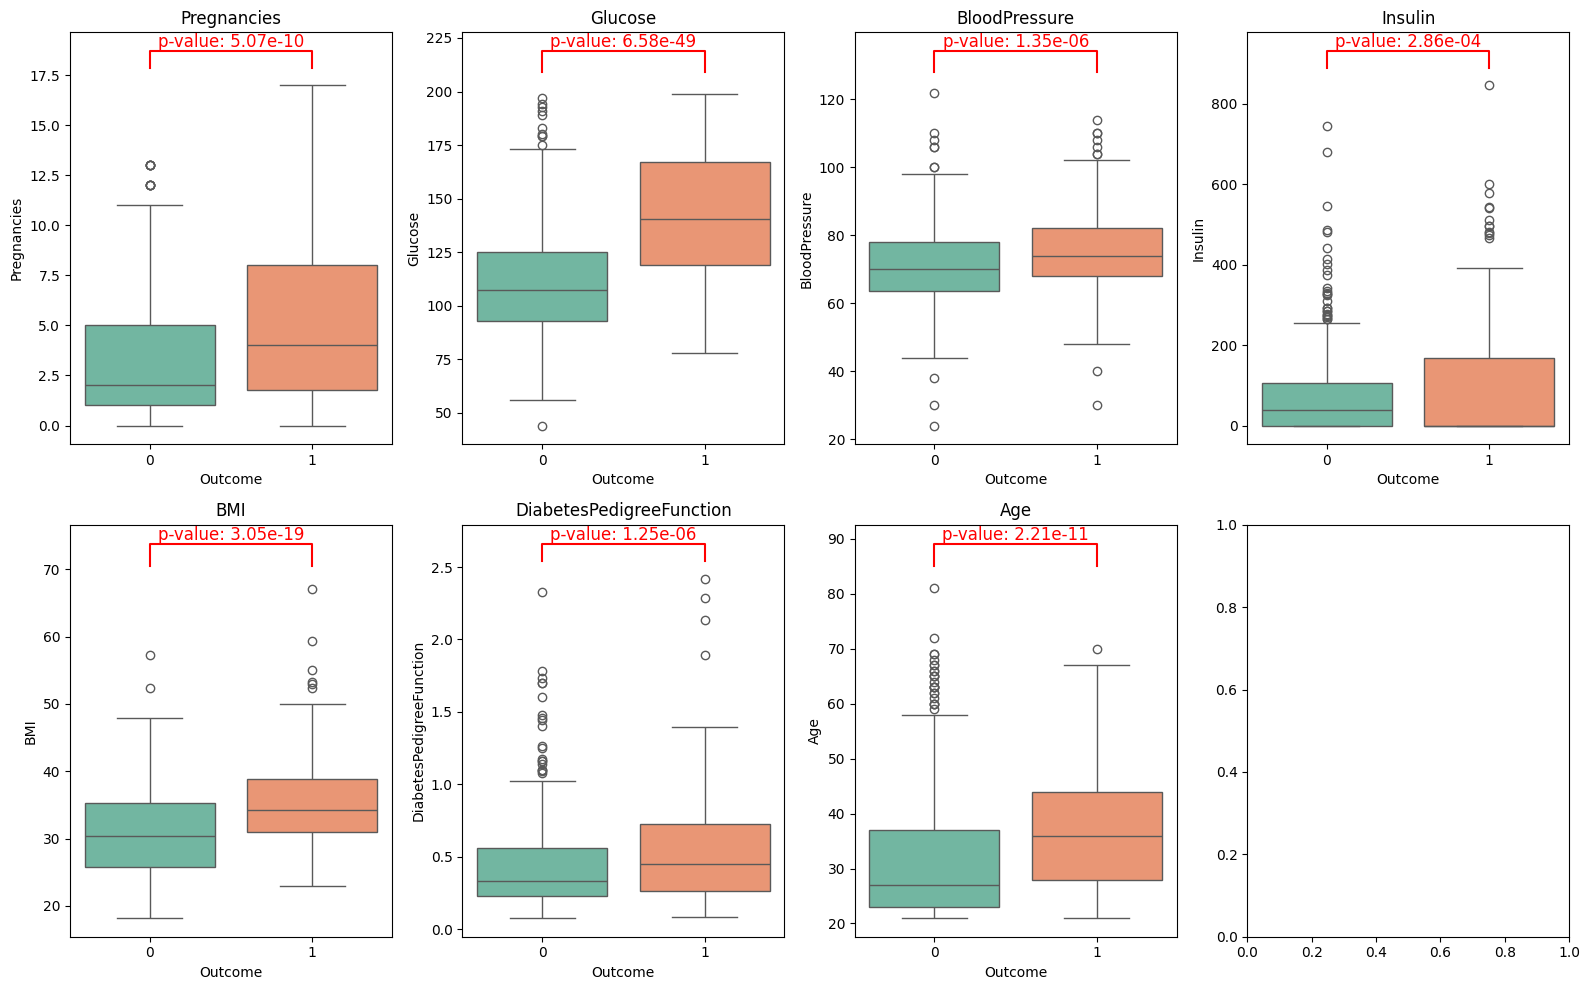

In [51]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Définir la palette de couleurs avec deux couleurs distinctes pour les deux niveaux de 'Outcome'
palette = sns.color_palette("Set2", 2)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=data['Outcome'], y=feature, data=data, ax=axes[i], palette=palette, hue='Outcome', legend=False)
    t_stat, p_value = ttest_ind(data[data['Outcome'] == 0][feature], data[data['Outcome'] == 1][feature], nan_policy='omit')    
    max_value = data[feature].max()
    y, h, col = max_value + (max_value * 0.05), max_value * 0.05, 'blue'
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c='red')
    axes[i].text(0.5, y+h, f'p-value: {p_value:.2e}', ha='center', va='bottom', color='red', fontsize=12)
    axes[i].set_title(feature)


plt.tight_layout()
plt.show()

In [52]:
'''
TTEST : 

Résultats pour la colonne 'BloodPressure':
t-statistic: -1.8047023017353887
p-value: 0.07151390009776082

p > 0.05 > pas de corrélation démontrée d'apres pvalue
Cependant des études scientifiques montrent que 70% des personnes souffrant de diabete type 2
souffrent également d'hypertension donc on garde la colonne

'''

"\nTTEST : \n\nRésultats pour la colonne 'BloodPressure':\nt-statistic: -1.8047023017353887\np-value: 0.07151390009776082\n\np > 0.05 > pas de corrélation démontrée d'apres pvalue\nCependant des études scientifiques montrent que 70% des personnes souffrant de diabete type 2\nsouffrent également d'hypertension donc on garde la colonne\n\n"

In [53]:
'''
    Des etudes médicales ont demontrées que l'epaisseur de la peau n'etait pas corrolé au diabete, 
    de plus le test est difficile sur les diabétiques à cause de l'élasticité de la peau.
    On drop la colonne
    
'''

"\n    Des etudes médicales ont demontrées que l'epaisseur de la peau n'etait pas corrolé au diabete, \n    de plus le test est difficile sur les diabétiques à cause de l'élasticité de la peau.\n    On drop la colonne\n    \n"

In [54]:
data = data.drop(columns='SkinThickness')

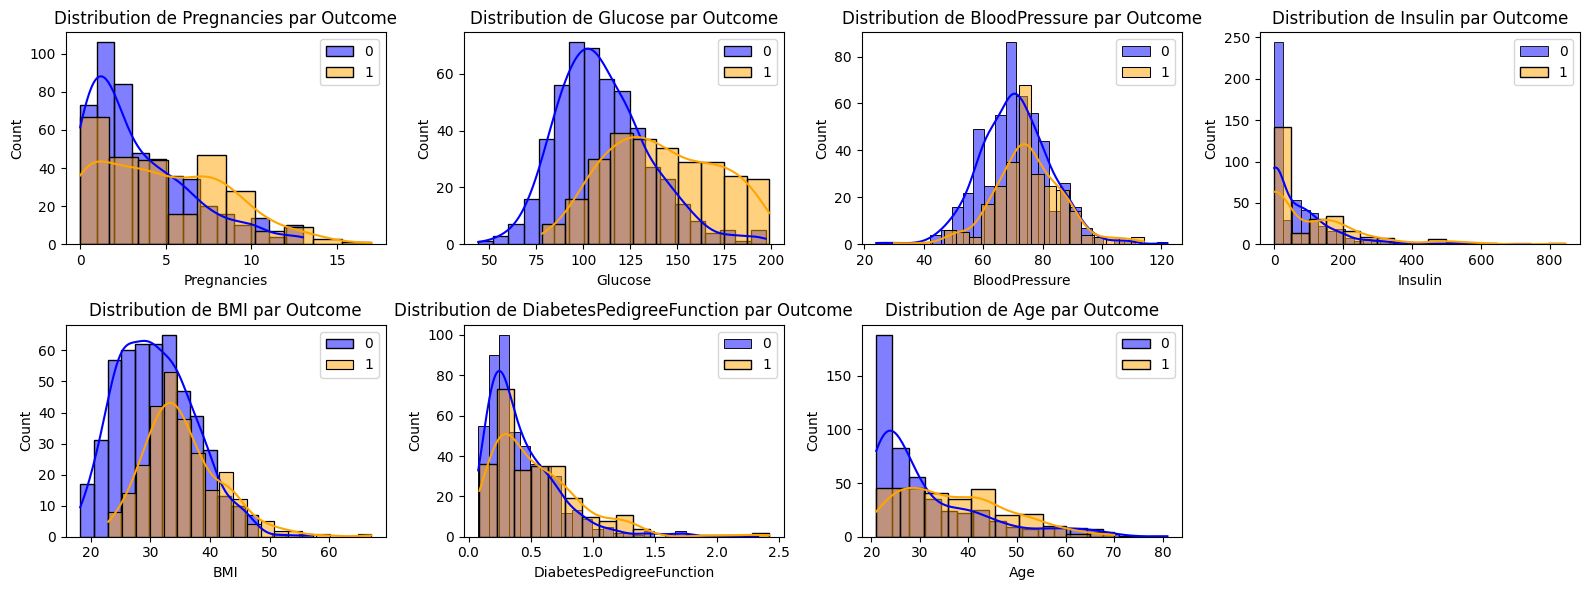

In [55]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les distributions
for i, feature in enumerate(features):
    sns.histplot(data[data['Outcome'] == 0][feature], color='blue', kde=True, ax=axs[i], label='0')
    sns.histplot(data[data['Outcome'] == 1][feature], color='orange', kde=True, ax=axs[i], label='1')
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [56]:
# Calculer la skewness pour chaque colonne pour Outcome = 1
skewness_outcome_1 = data[data['Outcome'] == 1].apply(lambda x: skew(x.dropna()))

# Calculer la skewness pour chaque colonne pour Outcome = 0
skewness_outcome_0 = data[data['Outcome'] == 0].apply(lambda x: skew(x.dropna()))

# Afficher les résultats
print("Skewness pour Outcome = 1 :")
print(skewness_outcome_1)

print("\nSkewness pour Outcome = 0 :")
print(skewness_outcome_0)

Skewness pour Outcome = 1 :
Pregnancies                 0.500925
Glucose                     0.091460
BloodPressure               0.099083
Insulin                     1.833495
BMI                         1.019101
DiabetesPedigreeFunction    1.712718
Age                         0.578385
Outcome                          NaN
dtype: float64

Skewness pour Outcome = 0 :
Pregnancies                 1.110760
Glucose                     0.655393
BloodPressure               0.172268
Insulin                     2.491239
BMI                         0.477131
DiabetesPedigreeFunction    2.000218
Age                         1.566891
Outcome                          NaN
dtype: float64


C:\Users\corre\AppData\Local\Temp\ipykernel_16020\1262868210.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_outcome_1 = data[data['Outcome'] == 1].apply(lambda x: skew(x.dropna()))


### 2.2 - Traitement des doublons

In [57]:
data.duplicated().sum()

0

### 2.3 - Traitement des valeurs abérantes

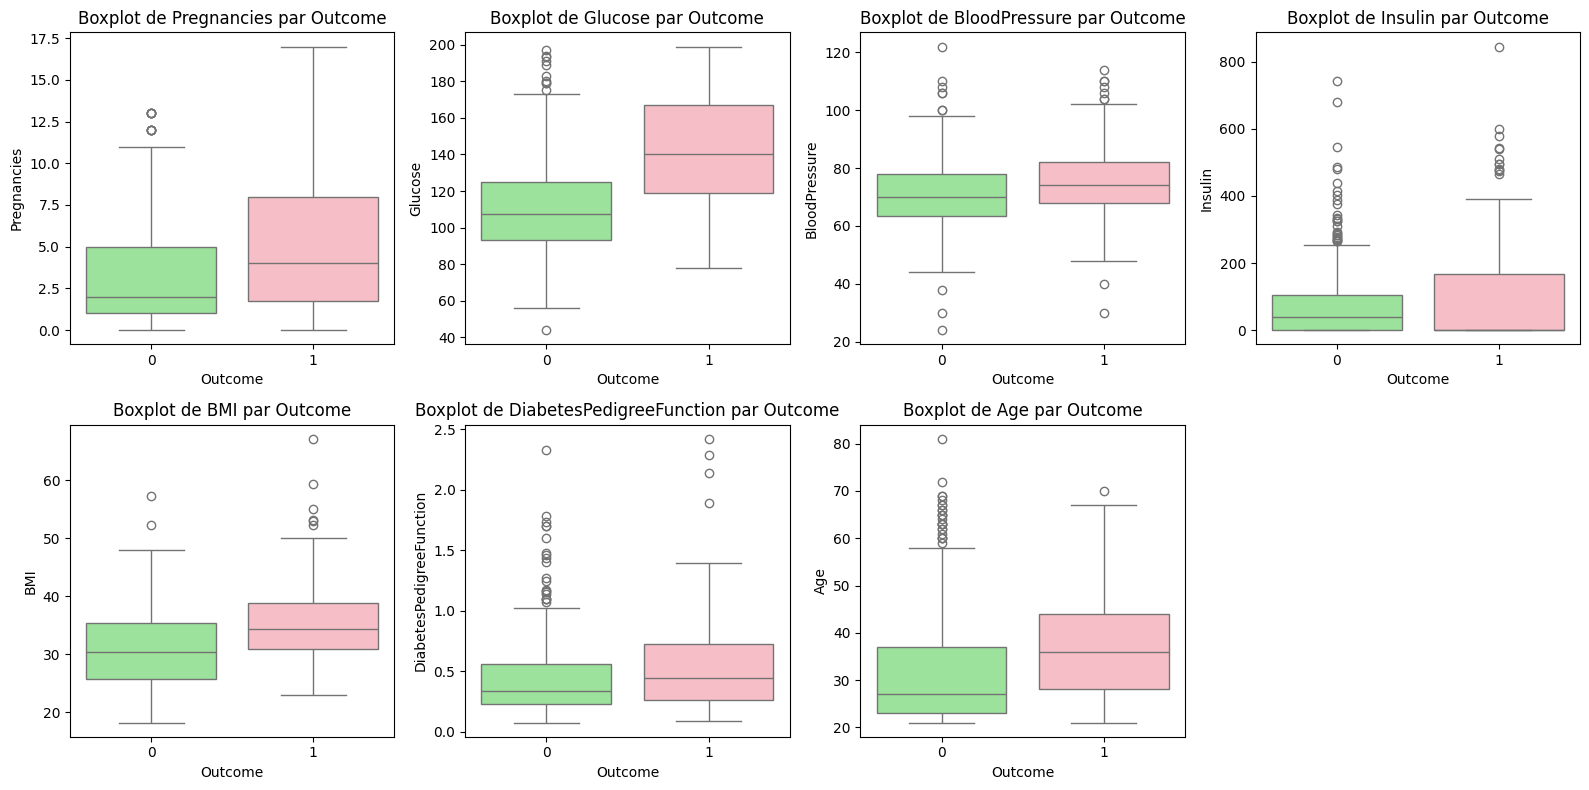

In [58]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les boîtes à moustaches
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=data, hue='Outcome', palette=['lightgreen', 'lightpink'], ax=axs[i], legend=False)
    axs[i].set_title(f'Boxplot de {feature} par Outcome')

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [59]:
'''

Traiter les valeurs abérrantes de : 

    BMI car au dessus de 50/60, on est sur des valeurs extreme, 70 de BMI correspond a 306kg pour 1.75m
    Au dessus de 30 on parle deja d'obesité

    SkinThickNess valeur de 100 dans outcome = 1 impossible

    BloodPressure > valeurs extrement basse impossible, en dessous de 50 on est deja dans des situation med d'urgence
    donc pas possible pour un test

    les valeurs d'insuline peuvent s'expliquées mais ne vaut il pas mieux utiliser un standarScarler pour limiter les ecarts ?
    
'''

"\n\nTraiter les valeurs abérrantes de : \n\n    BMI car au dessus de 50/60, on est sur des valeurs extreme, 70 de BMI correspond a 306kg pour 1.75m\n    Au dessus de 30 on parle deja d'obesité\n\n    SkinThickNess valeur de 100 dans outcome = 1 impossible\n\n    BloodPressure > valeurs extrement basse impossible, en dessous de 50 on est deja dans des situation med d'urgence\n    donc pas possible pour un test\n\n    les valeurs d'insuline peuvent s'expliquées mais ne vaut il pas mieux utiliser un standarScarler pour limiter les ecarts ?\n    \n"

In [60]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Colonnes pour les outliers
colonnes_outlier_0 = ['Glucose', 'BMI', 'BloodPressure']
colonnes_outlier_1 = ['BMI', 'BloodPressure']

# Suppression des outliers
data_outlier_0 = remove_outliers(data_outcome_0, colonnes_outlier_0)
data_outlier_1 = remove_outliers(data_outcome_1, colonnes_outlier_1)

# Fusion des deux ensembles de données
data_clean_outlier_nan = pd.concat([data_outlier_0, data_outlier_1], ignore_index=True)

In [61]:
data_clean_outlier_nan.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            1       89             66             23       94  28.1   
2            5      116             74              0        0  25.6   
3            4      110             92              0        0  37.6   
4           10      139             80              0        0  27.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     0.167   21        0  
2                     0.201   30        0  
3                     0.191   30        0  
4                     1.441   57        0

## 3 - Modélisation des données

## Test sur le DataFrame ou les outliers sont toujours présents. ##

In [62]:
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=0)
    return accuracy, conf_matrix, class_report

In [63]:
# Initialisation des scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer(),
    'PowerTransformer': PowerTransformer()
}

# Initialisation des modèles de classification
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME'),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=2000),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB()
    }

In [64]:
data

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [65]:
# Séparation des caractéristiques et de la cible
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)

# Initialiser les variables pour suivre le meilleur modèle
best_score = float('-inf')
best_model = None
best_model_name = ''
best_scaler_name = ''
best_confusion_matrix = None
best_classification_report = None


# Appliquer les scalers et entraîner les modèles
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        score, conf_matrix, class_report = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, model)
        
        if score > best_score:
            best_score = score
            best_model = model
            best_model_name = model_name
            best_scaler_name = scaler_name
            best_confusion_matrix = conf_matrix
            best_classification_report = class_report

# Afficher le meilleur modèle et scaler
print(f'Best model: {best_model_name}')
print(f'Best scaler: {best_scaler_name}')
print(f'Best score: {best_score:.4f}')

# Affichage de la matrice de confusion et du rapport de classification du meilleur modèle
print('Confusion Matrix of the Best Model:')
print(best_confusion_matrix)
print('Classification Report of the Best Model:')
print(best_classification_report)

Best model: ExtraTreesClassifier
Best scaler: PowerTransformer
Best score: 0.7931
Confusion Matrix of the Best Model:
[[68  8]
 [16 24]]
Classification Report of the Best Model:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        76
           1       0.75      0.60      0.67        40

    accuracy                           0.79       116
   macro avg       0.78      0.75      0.76       116
weighted avg       0.79      0.79      0.79       116



In [66]:
data

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


##  Test de requilibrage des echantillons avec smote ##

In [68]:
# Utilisation de SMOTE pour suréchantillonner les données d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialiser les variables pour suivre le meilleur modèle
best_score_smote = float('-inf')
best_model_smote = None
best_model_name_smote = ''
best_scaler_name_smote = ''
best_confusion_matrix_smote = None
best_classification_report_smote = None

# Appliquer les scalers et entraîner les modèles
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train_scaled, y_train_resampled)
        # Prédire les valeurs
        y_pred = model.predict(X_test_scaled)
        # Évaluer le modèle
        score = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, zero_division=0)
    
        # Mettre à jour le meilleur modèle si nécessaire
        if score > best_score_smote:
            best_score_smote = score
            best_model_smote = model
            best_model_name_smote = model_name
            best_scaler_name_smote = scaler_name
            best_confusion_matrix_smote = conf_matrix
            best_classification_report_smote = class_report

# Afficher le meilleur modèle et scaler
print(f'Best model: {best_model_name_smote}')
print(f'Best scaler: {best_scaler_name_smote}')
print(f'Best score: {best_score_smote:.4f}')

# Affichage de la matrice de confusion et du rapport de classification du meilleur modèle
print('Confusion Matrix of the Best Model:')
print(best_confusion_matrix_smote)
print('Classification Report of the Best Model:')
print(best_classification_report_smote)

Best model: MLPClassifier
Best scaler: MinMaxScaler
Best score: 0.8190
Confusion Matrix of the Best Model:
[[63 13]
 [ 8 32]]
Classification Report of the Best Model:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        76
           1       0.71      0.80      0.75        40

    accuracy                           0.82       116
   macro avg       0.80      0.81      0.81       116
weighted avg       0.83      0.82      0.82       116



In [69]:

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialiser le modèle MLPClassifier
mlp =  MLPClassifier()


# Définir le pipeline
numeric_transformer_std = ImbPipeline( steps= [
    ('scaler', StandardScaler())                                     # Modèle
])


# Combinaison des transformation pour le preprocessing
preprocessor = ColumnTransformer(
    transformers= [
        ('num_std', numeric_transformer_std, features), 
])


pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=3, random_state=42)) ,
    ('model', mlp)
])


# Définir la grille des paramètres à tester
param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50)],
    'model__activation': ['logistic', 'tanh', 'relu'],
    'model__solver': ['lbfgs', 'sgd', 'adam'],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1],
    'model__learning_rate': ['constant', 'adaptive']
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner GridSearchCV avec les données mises à l'échelle
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score:.4f}')


Best parameters: {'model__activation': 'relu', 'model__alpha': 0.1, 'model__hidden_layer_sizes': (50,), 'model__learning_rate': 'adaptive', 'model__solver': 'adam'}
Best cross-validation score: 0.7715


In [70]:
# Sauvegarder le pipeline
joblib.dump(grid_search.best_estimator_, 'MPLclassifier_diabete.plk')


['MPLclassifier_diabete.plk']

## Test sans les outliers ##

In [71]:
X2 = data_clean_outlier_nan.drop(columns='Outcome')
y2 = data_clean_outlier_nan['Outcome']

# Diviser les données en ensembles d'entraînement et de test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.10, random_state=0, stratify=y2)

In [72]:
# Stratified split pour obtenir des sous-échantillons équilibrés
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in splitter.split(X2, y2):
    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2.iloc[train_index], y2.iloc[test_index]

# Initialiser les variables pour suivre le meilleur modèle
best_score_outlier = float('-inf')
best_model_outlier = None
best_model_name_outlier = ''
best_scaler_name_outlier = ''
best_confusion_matrix_outlier = None
best_classification_report_outlier = None

# Appliquer les scalers et entraîner les modèles
for scaler_name, scaler in scalers.items():
    X_train_scaled2 = scaler.fit_transform(X_train2)
    X_test_scaled2 = scaler.transform(X_test2)
    
    for model_name, model in models.items():
        
        # Appliquer RandomUnderSampler pour gérer le déséquilibre
        sampler = RandomUnderSampler(random_state=0)
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled2, y_train2)
        
        # Entraîner le modèle
        model.fit(X_train_resampled, y_train_resampled)
        # Prédire les valeurs
        y_pred = model.predict(X_test_scaled2)
        # Évaluer le modèle
        score = accuracy_score(y_test2, y_pred)
        conf_matrix = confusion_matrix(y_test2, y_pred)
        class_report = classification_report(y_test2, y_pred, zero_division=0)
        
        
        # Mettre à jour le meilleur modèle si nécessaire
        if score > best_score_outlier:
            best_score_outlier = score
            best_model_outlier = model
            best_model_name_outlier = model_name
            best_scaler_name_outlier = scaler_name
            best_confusion_matrix_outlier = conf_matrix
            best_classification_report_outlier = class_report

# Afficher le meilleur modèle et scaler
print(f'Best model: {best_model_name_outlier}')
print(f'Best scaler: {best_scaler_name_outlier}')
print(f'Best score: {best_score_outlier:.4f}')

# Affichage de la matrice de confusion et du rapport de classification du meilleur modèle
print('Confusion Matrix of the Best Model:')
print(best_confusion_matrix_outlier)
print('Classification Report of the Best Model:')
print(best_classification_report_outlier)

Best model: ExtraTreesClassifier
Best scaler: StandardScaler
Best score: 0.7643
Confusion Matrix of the Best Model:
[[69 22]
 [11 38]]
Classification Report of the Best Model:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        91
           1       0.63      0.78      0.70        49

    accuracy                           0.76       140
   macro avg       0.75      0.77      0.75       140
weighted avg       0.78      0.76      0.77       140



In [73]:
from imblearn.over_sampling import BorderlineSMOTE


# Définir la grille d'hyperparamètres pour ExtraTreesClassifier
param_grid_extra_trees = {
    'extra_trees__n_estimators': [100, 150, 200],
    'extra_trees__max_depth': [None, 10, 20],
    'extra_trees__min_samples_split': [2, 5],
    'extra_trees__min_samples_leaf': [1, 2],
    'extra_trees__bootstrap': [True, False],
    'extra_trees__class_weight': ['balanced', None]  # Ajouter class_weight
}

# Définir la grille d'hyperparamètres pour BorderlineSMOTE
param_grid_smote = {
    'smote__sampling_strategy': [1.0, 'auto']  # Essayer différentes stratégies de suréchantillonnage
}

# Créer un pipeline avec BorderlineSMOTE, RobustScaler et ExtraTreesClassifier
pipeline_with_smote = ImbPipeline([
    ('smote', BorderlineSMOTE(random_state=0)),
    ('scaler', RobustScaler()),
    ('extra_trees', ExtraTreesClassifier(random_state=0))
])

# Initialiser GridSearchCV avec une validation croisée
grid_search = GridSearchCV(estimator=pipeline_with_smote,
                           param_grid={**param_grid_extra_trees, **param_grid_smote},
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           error_score='raise')

# Entraîner GridSearchCV
grid_search.fit(X_train2, y_train2)

# Afficher les meilleurs paramètres et le meilleur score
print("Best parameters for ExtraTreesClassifier with SMOTE:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (cross-validation): {grid_search.best_score_:.4f}")

# Évaluer le modèle sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test2)
test_score = accuracy_score(y_test2, y_pred)
print(f"Test score: {test_score:.4f}")

# Validation croisée sur l'ensemble des données
cv_scores = cross_val_score(best_model, X2, y2, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Afficher la matrice de confusion et le rapport de classification du meilleur modèle
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred, zero_division=0)

print('Confusion Matrix of the Best Model with SMOTE:')
print(conf_matrix)
print('Classification Report of the Best Model with SMOTE:')
print(class_report)


Best parameters for ExtraTreesClassifier with SMOTE:
Best parameters: {'extra_trees__bootstrap': False, 'extra_trees__class_weight': 'balanced', 'extra_trees__max_depth': 10, 'extra_trees__min_samples_leaf': 2, 'extra_trees__min_samples_split': 2, 'extra_trees__n_estimators': 200, 'smote__sampling_strategy': 1.0}
Best score (cross-validation): 0.7867
Test score: 0.7357
Cross-validation scores: [0.74285714 0.72857143 0.75       0.82014388 0.75539568]
Mean cross-validation score: 0.7594
Confusion Matrix of the Best Model with SMOTE:
[[68 23]
 [14 35]]
Classification Report of the Best Model with SMOTE:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        91
           1       0.60      0.71      0.65        49

    accuracy                           0.74       140
   macro avg       0.72      0.73      0.72       140
weighted avg       0.75      0.74      0.74       140



In [74]:
data.head(1)

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1

In [75]:
data.head(1).to_csv('premiere_ligne.csv', index=False)

In [ ]:
'''Si on garde ce ML precisement meme si l'accuracy global peut etre moins importante c'est*
 que je privilégie le model qui predit correctement les personnes malades. En effet le but est de la prevention,
 à partir de données d'un diagnostique qui sera confirmer par un medecin, le plus important est donc de perdre 
 au minimum de la precision sur la classe Outcome 1 qui sont les personnes malades (diagnostiquées ici ).
 Je me base donc sur la precision, le recall et le f1 score de la target Outcome 1'''

In [77]:
# Données des patients
data_1 = {
    "Pregnancies": [4, 0],
    "Glucose": [93, 132],
    "BloodPressure": [68, 39],
    "SkinThickness":  [25, 34],
    "Insulin": [93, 162],
    "BMI": [31.1, 41.1],
    "DiabetesPedigreeFunction": [0.183, 1.988],
    "Age": [26, 25]
}

# Création du DataFrame
df = pd.DataFrame(data_1)
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4       93             68             25       93  31.1   
1            0      132             39             34      162  41.1   

   DiabetesPedigreeFunction  Age  
0                     0.183   26  
1                     1.988   25

In [78]:
# Utiliser le meilleur modèle pour faire des prédictions sur le DataFrame fourni
predictions = grid_search.best_estimator_.predict(df)

print(predictions)


[0 1]
